In [1]:
import numpy as np
import pandas as pd
from glob import glob

import argparse
from os import path

from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_args():
    parser = argparse.ArgumentParser(description='GLM 2ndlevel Script')
    parser.add_argument('-n_perms', default=5000)
    parser.add_argument('-perm_p_thresh', default=.05)  # after permutation, what threshold to be above to include
    parser.add_argument('-NBS_p_thresh', default=.01)  # during permutation, what threshold to use before building graphs
    parser.add_argument('-nROI', default=268)
    parser.add_argument('-atlas_loc', default='shen_2mm_268_parcellation.nii.gz')
    parser.add_argument('-glm_noise_model', default='ar1')
    parser.add_argument('-results_base', default='results')
    parser.add_argument('-exclude_s7', action='store_true')
    parser.add_argument('-clip_blocks', action='store_true')
    parser.add_argument('-drop_nan_nodes', action='store_true')

    return parser.parse_args([])  # TODO!: remove [] when switching to script

In [3]:
args = get_args()

desc_pieces = [('clipBlocks-True' if args.clip_blocks else ''),
               ('noiseModel-OLS' if args.glm_noise_model=='ols' else ''),
               ('exclude-s7' if args.exclude_s7 else ''),
               ('drop_nan_nodes-True' if args.drop_nan_nodes else '')
              ]

desc = '_'.join([s for s in desc_pieces if s!=''])
scndlevel_desc = desc if desc!='' else 'standard'

secondlevel_dir = path.join(args.results_base, '2ndlevels', f'dataset-%s',f'desc-{scndlevel_desc}')

thirdlevel_dir = path.join(args.results_base, '3rdlevels',f'desc-{scndlevel_desc}')


In [4]:
dataset1_maxTs = glob(path.join(secondlevel_dir % '1', '*datatype-edge_2ndlevel-maxT.csv'))
dataset2_maxTs = glob(path.join(secondlevel_dir % '2', '*datatype-edge_2ndlevel-maxT.csv'))

dataset1_shortened = [f.split('/')[-1] for f in dataset1_maxTs]
dataset2_shortened = [f.split('/')[-1] for f in dataset2_maxTs]

overlapping_results = [f for f in dataset1_shortened if f in dataset2_shortened]
overlapping_results

['model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-maxT.csv',
 'model-trialType_contrast-probe_success_datatype-edge_2ndlevel-maxT.csv',
 'model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-maxT.csv',
 'model-VTCcorr_contrast-VTCcorr_datatype-edge_2ndlevel-maxT.csv',
 'model-VTC_convolved_contrast-vtc_datatype-edge_2ndlevel-maxT.csv',
 'model-trialType_contrast-common_fail_datatype-edge_2ndlevel-maxT.csv',
 'model-trialPrecursor_datatype-edge_2ndlevel-maxT.csv',
 'model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv']

In [5]:
nROI = 268

ridx, cidx = np.tril_indices(nROI, -1)

In [6]:
# currently not splitting by hemisphere, just clustering by network

shen_network_labels = loadmat('Shen_network_labels.mat')
network_mappings = shen_network_labels['Shen_network_labels'].flatten()
network_cluster_order = np.argsort(network_mappings)
ordered_networks = network_mappings[network_cluster_order]
print(ordered_networks) # proof that the sorting works

cutoffs = np.where(np.diff(network_mappings[network_cluster_order])!=0)[0] + 1 # shift to hit the gaps

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8]


In [7]:
shen_network_labels['network'][0]

array([(array([[1]], dtype=uint8), array([[2]], dtype=uint8), array([[3]], dtype=uint8), array([[4]], dtype=uint8), array([[5]], dtype=uint8), array([[7]], dtype=uint8), array([[6]], dtype=uint8), array([[8]], dtype=uint8))],
      dtype=[('medialfrontal', 'O'), ('frontalparietal', 'O'), ('default', 'O'), ('subcorticalcerebellar', 'O'), ('motor', 'O'), ('visual2', 'O'), ('visual1', 'O'), ('visualassociation', 'O')])

In [8]:
network_names = ['medialfrontal', 'frontalparietal', 'default', 'subcorticalcerebellar', 'motor', 'visual2', 'visual1', 'visualassociation']

# only plot edge results, all same colorbar

In [9]:
overlapping_results

['model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-maxT.csv',
 'model-trialType_contrast-probe_success_datatype-edge_2ndlevel-maxT.csv',
 'model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-maxT.csv',
 'model-VTCcorr_contrast-VTCcorr_datatype-edge_2ndlevel-maxT.csv',
 'model-VTC_convolved_contrast-vtc_datatype-edge_2ndlevel-maxT.csv',
 'model-trialType_contrast-common_fail_datatype-edge_2ndlevel-maxT.csv',
 'model-trialPrecursor_datatype-edge_2ndlevel-maxT.csv',
 'model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv']

In [10]:
max_val = -np.inf
mats = np.empty((2, len(overlapping_results)), dtype='object')
for r, res in enumerate(overlapping_results):
    print(res.split('_2ndlevel-')[0])
    print('positive | negative | significant')
    for i, method in enumerate(["maxT", "NBS"]):
        print(method)
        curr_res = res.replace("maxT", method)
        

        res_d1 = pd.read_csv(path.join(secondlevel_dir % '1', curr_res), header=None).values
        res_d2 = pd.read_csv(path.join(secondlevel_dir % '2', curr_res), header=None).values
        
        
        d1_pos = res_d1[ridx, cidx] > 0
        d1_neg = res_d1[ridx, cidx] < 0
        d1_sig = res_d1[ridx, cidx] != 0
        print('d1: ', d1_pos.sum(), d1_neg.sum(), d1_sig.sum())
        d2_pos = res_d2[ridx, cidx] > 0
        d2_neg = res_d2[ridx, cidx] < 0
        d2_sig = res_d2[ridx, cidx] != 0
        print('d2: ', d2_pos.sum(), d2_neg.sum(), d2_sig.sum())
        print('overlap: ', (d1_pos*d2_pos).sum(), (d1_neg*d2_neg).sum(), (d1_pos*d2_pos).sum() + (d1_neg*d2_neg).sum())
        
                
        
        split_res = np.full((nROI, nROI), np.nan)

        # sort into network order, then grab the lower triangles
        # lower triangle is d1, upper triangle is d2
        split_res[ridx, cidx] = res_d2[np.ix_(network_cluster_order, network_cluster_order)][ridx, cidx]
        split_res = split_res.T # flip to fill in lower triangle
        split_res[ridx, cidx] = res_d1[np.ix_(network_cluster_order, network_cluster_order)][ridx, cidx]

        max_val = max(max_val, np.nanmax(np.abs(split_res)))

        mats[i, r] = split_res

model-trialType_contrast-probe_success-probe_fail_datatype-edge
positive | negative | significant
maxT
d1:  0 1 1
d2:  2 20 22
overlap:  0 0 0
NBS
d1:  578 509 1087
d2:  651 808 1459
overlap:  38 52 90
model-trialType_contrast-probe_success_datatype-edge
positive | negative | significant
maxT
d1:  8 9 17
d2:  164 198 362
overlap:  0 2 2
NBS
d1:  1176 1228 2404
d2:  2747 2657 5404
overlap:  364 370 734
model-trialType_contrast-probe_fail+probe_success_datatype-edge
positive | negative | significant
maxT
d1:  30 16 46
d2:  205 211 416
overlap:  4 3 7
NBS
d1:  1839 1827 3666
d2:  2846 2469 5315
overlap:  669 583 1252
model-VTCcorr_contrast-VTCcorr_datatype-edge
positive | negative | significant
maxT
d1:  0 0 0
d2:  1 1 2
overlap:  0 0 0
NBS
d1:  298 378 676
d2:  481 346 827
overlap:  5 13 18
model-VTC_convolved_contrast-vtc_datatype-edge
positive | negative | significant
maxT
d1:  0 0 0
d2:  0 0 0
overlap:  0 0 0
NBS
d1:  0 0 0
d2:  0 0 0
overlap:  0 0 0
model-trialType_contrast-common_fa

In [11]:
from matplotlib.colors import LinearSegmentedColormap

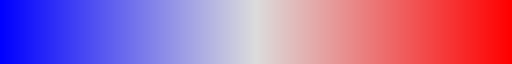

In [31]:
curr_cmap = LinearSegmentedColormap.from_list('network_name', ['blue', 'gainsboro', 'red'])
curr_cmap.set_bad(color='gray')
curr_cmap

In [23]:
label_locs = (np.concatenate([[0], cutoffs]) + np.concatenate([cutoffs, [268]])) / 2

model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-maxT.csv


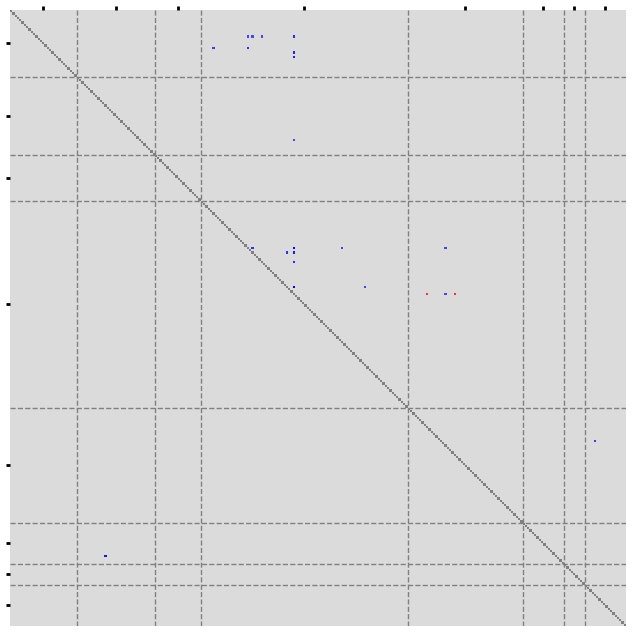

model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-NBS.csv


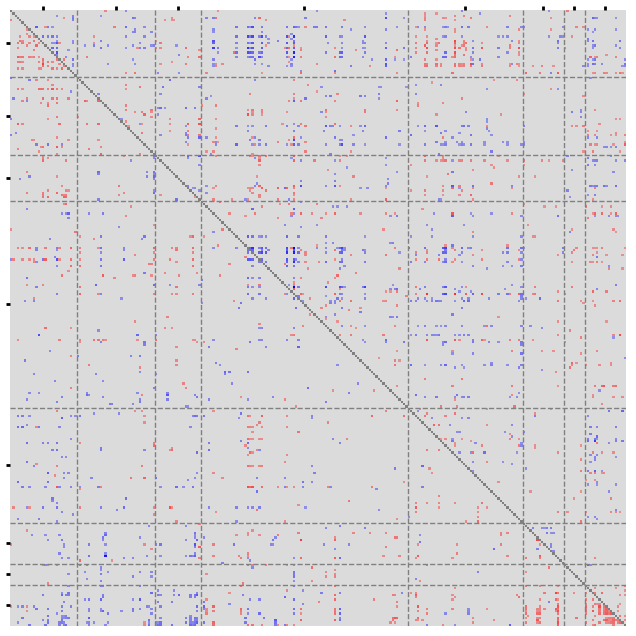

model-trialType_contrast-probe_success_datatype-edge_2ndlevel-maxT.csv


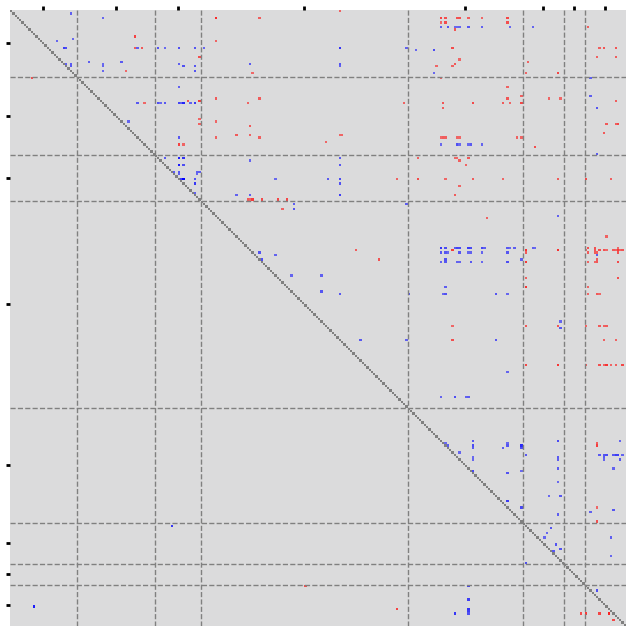

model-trialType_contrast-probe_success_datatype-edge_2ndlevel-NBS.csv


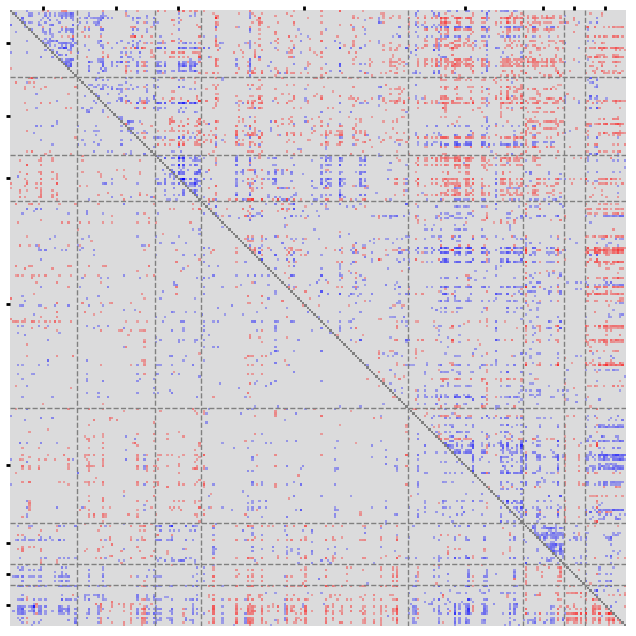

model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-maxT.csv


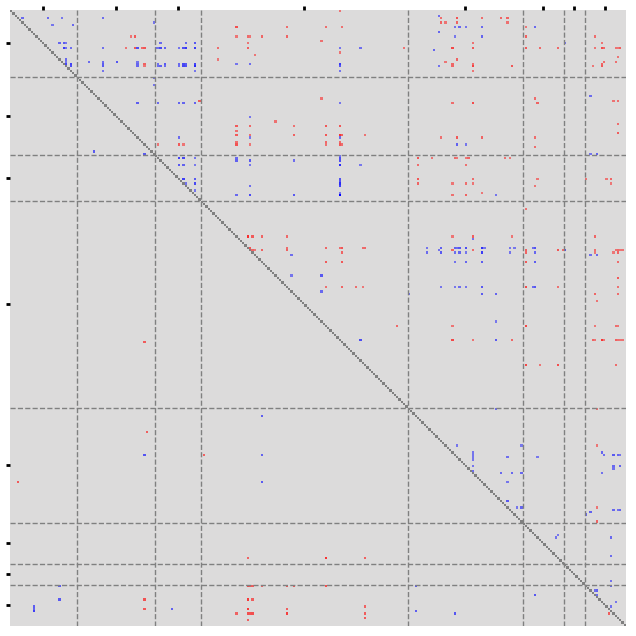

model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-NBS.csv


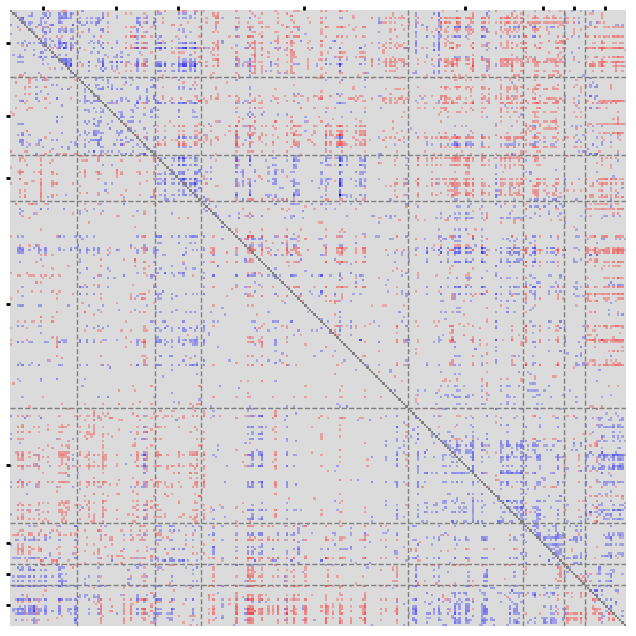

model-VTCcorr_contrast-VTCcorr_datatype-edge_2ndlevel-maxT.csv


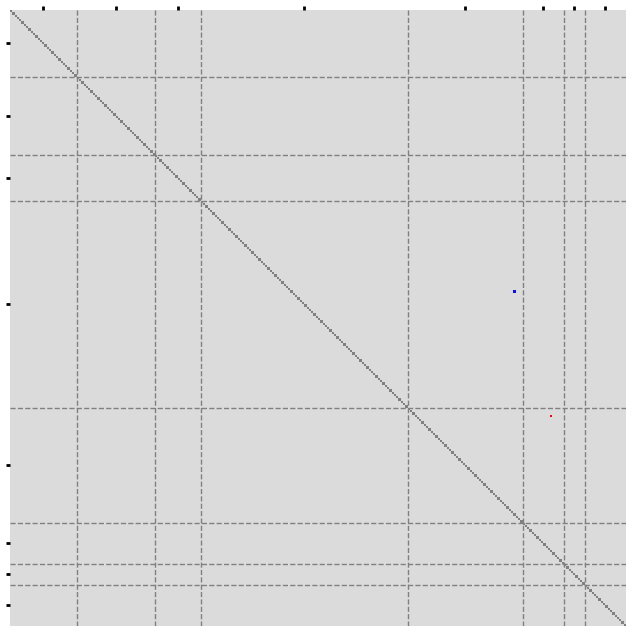

model-VTCcorr_contrast-VTCcorr_datatype-edge_2ndlevel-NBS.csv


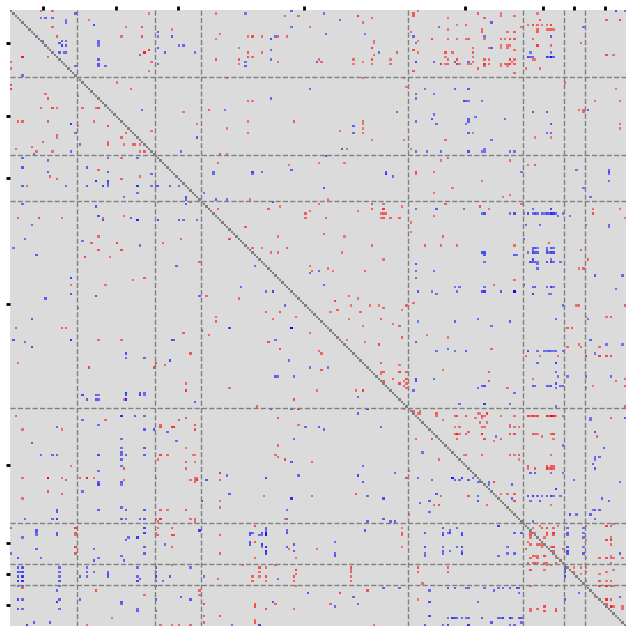

model-VTC_convolved_contrast-vtc_datatype-edge_2ndlevel-maxT.csv


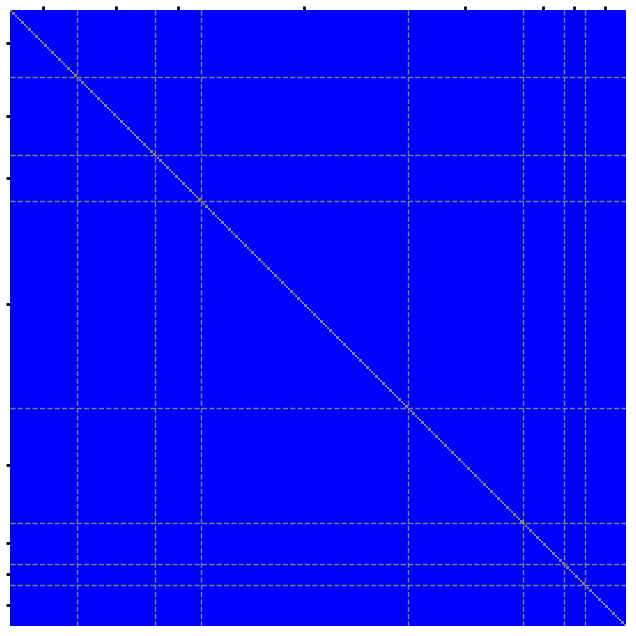

model-VTC_convolved_contrast-vtc_datatype-edge_2ndlevel-NBS.csv


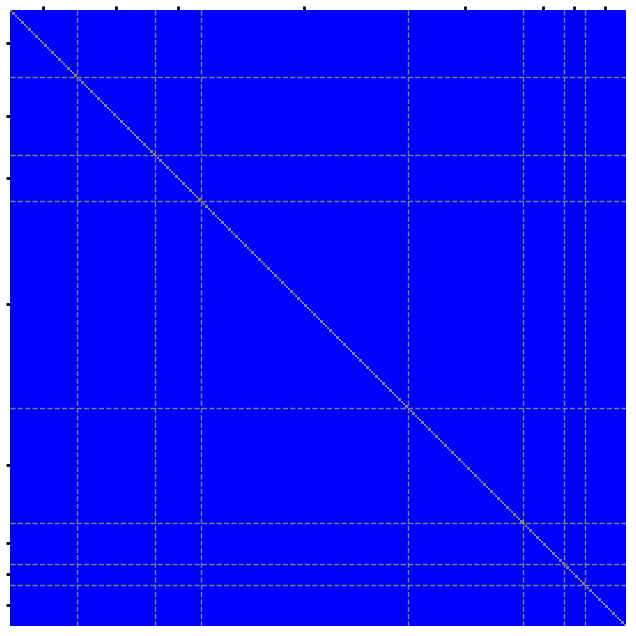

model-trialType_contrast-common_fail_datatype-edge_2ndlevel-maxT.csv


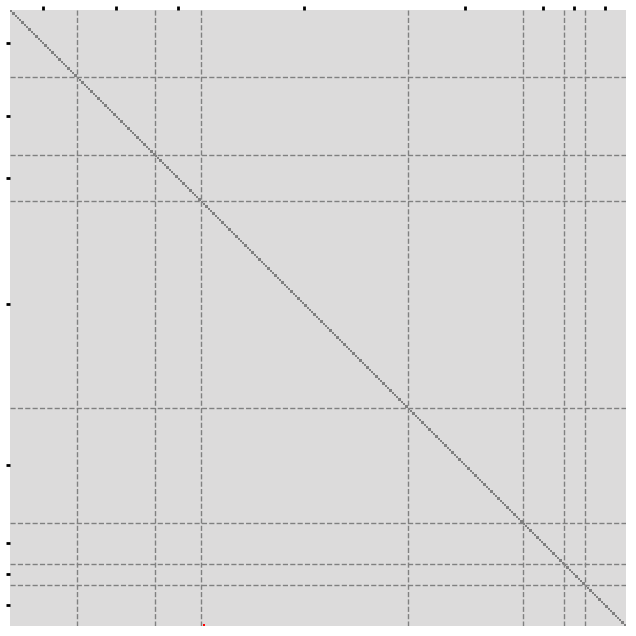

model-trialType_contrast-common_fail_datatype-edge_2ndlevel-NBS.csv


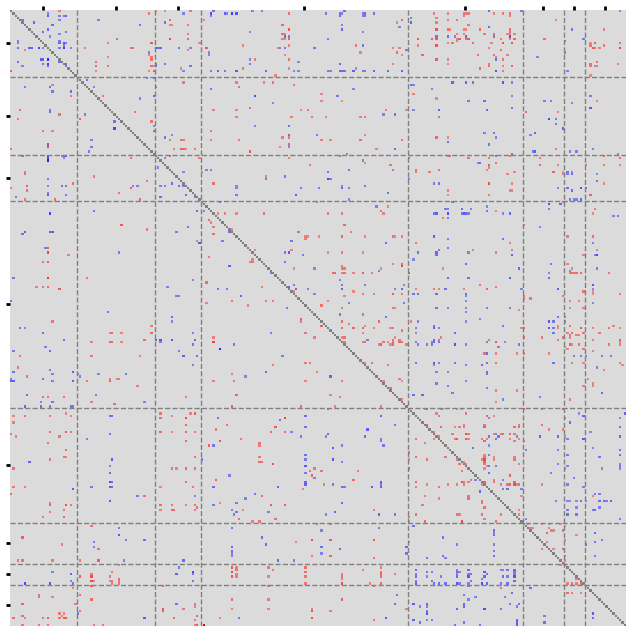

model-trialPrecursor_datatype-edge_2ndlevel-maxT.csv


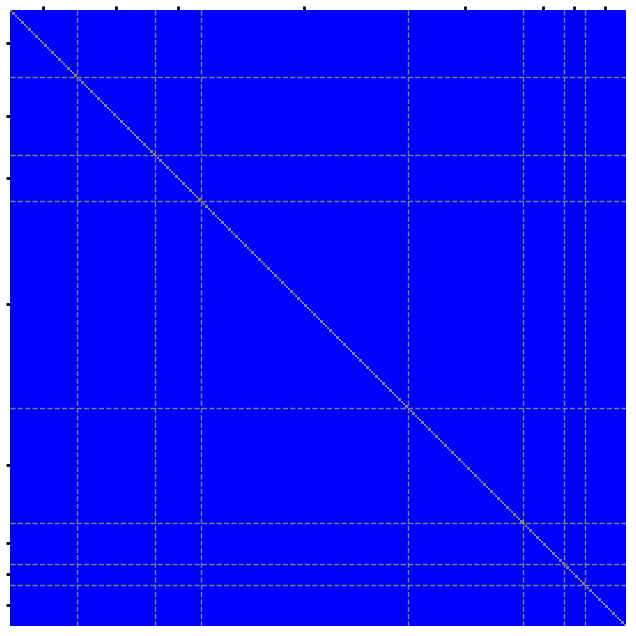

model-trialPrecursor_datatype-edge_2ndlevel-NBS.csv


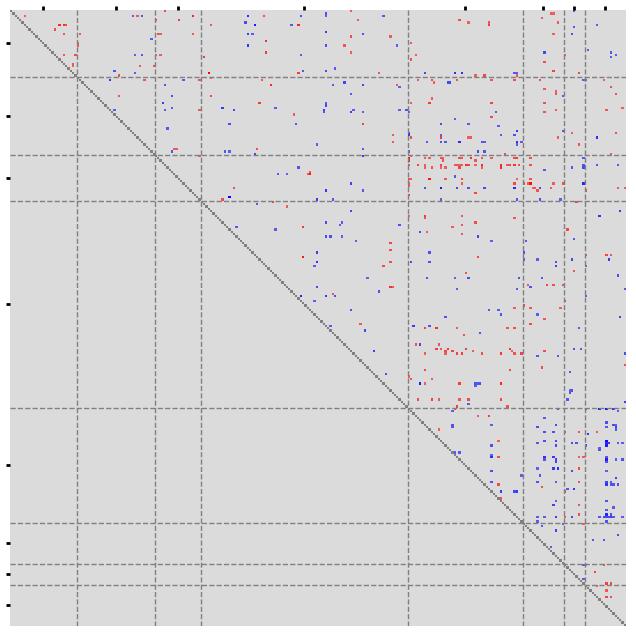

model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv


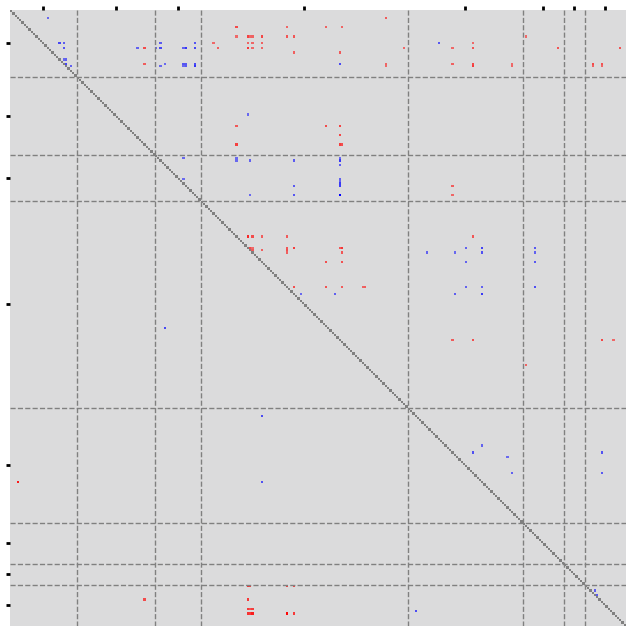

model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-NBS.csv


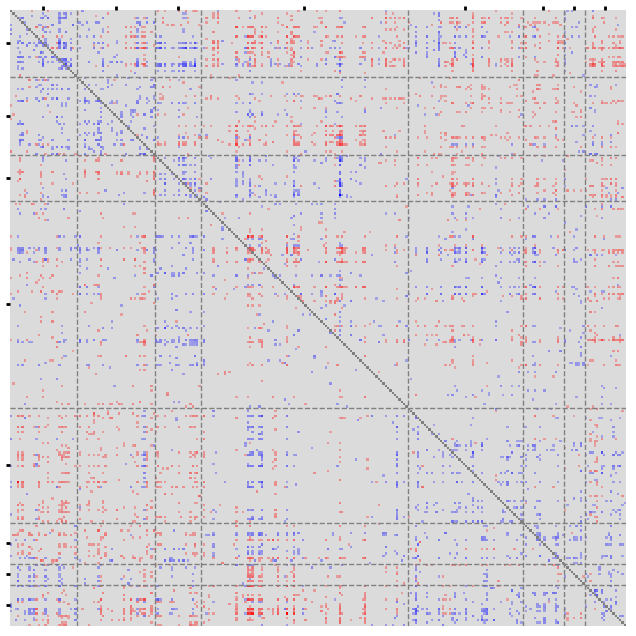

In [32]:
for r, res in enumerate(overlapping_results):
    for i, method in enumerate(["maxT", "NBS"]):
        curr_res = res.replace("maxT", method)

        plt.figure(figsize=(8,8))  
        ax = sns.heatmap(mats[i, r],
                         square=True,
                         center=0,
                         rasterized=True,
                         cmap=curr_cmap,
                         cbar=False)
        _ = ax.hlines(cutoffs, *ax.get_xlim(), color='gray', linewidth=1, linestyle='dashed')
        _ = ax.vlines(cutoffs, *ax.get_xlim(), color='gray', linewidth=1, linestyle='dashed')

        # clean up ticks to use with network labels
        ax.set_aspect("equal")
        ax.set_xticks(label_locs)
        _ = ax.set_xticklabels([])
        ax.xaxis.tick_top()
        ax.set_yticks(label_locs)
        _ = ax.set_yticklabels([])
        ax.tick_params(width=2, length=3)
        
    
        plt.savefig(f"results/figures/heatmap_{curr_res.replace('csv', 'png')}", bbox_inches="tight", dpi=96, transparent=True)
        print(curr_res)
        plt.show()
        plt.close()

### Trial Precursor, NBS, dataset 2 only (for supp fig)

In [ ]:
i = 1
method = 'NBS'
r = 7
res = overlapping_results[7]
res

'model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv'

In [ ]:
nbs_mat = mats[i, r]

nbs_mat[ridx, cidx] = nbs_mat.T[ridx, cidx]

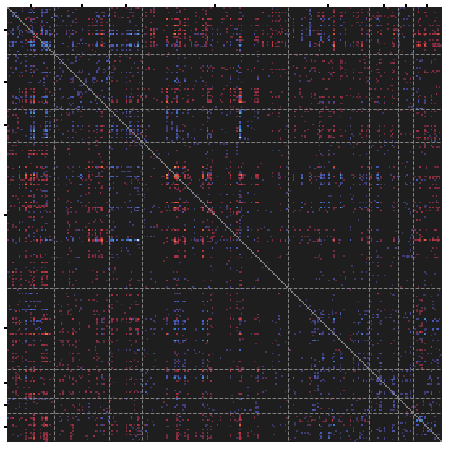

In [ ]:
plt.figure(figsize=(8,8))  
ax = sns.heatmap(nbs_mat,
                 square=True,
                 center=0,
                 rasterized=True,
                 cmap=curr_cmap,
                 cbar=False)
_ = ax.hlines(cutoffs, *ax.get_xlim(), color='gray', linewidth=1, linestyle='dashed')
_ = ax.vlines(cutoffs, *ax.get_xlim(), color='gray', linewidth=1, linestyle='dashed')

# clean up ticks to use with network labels
ax.set_xticks(label_locs)
_ = ax.set_xticklabels([])
ax.xaxis.tick_top()
ax.set_yticks(label_locs)
_ = ax.set_yticklabels([])
ax.tick_params(width=2, length=3)
ax.set_aspect("equal")

plt.savefig(f"results/figures/heatmap_TrialPrecursor_secondlevel-NBS_dataset-2_ONLY.png", bbox_inches="tight", dpi=96)
plt.show()
plt.close()

## Compressed versions

model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-maxT.csv


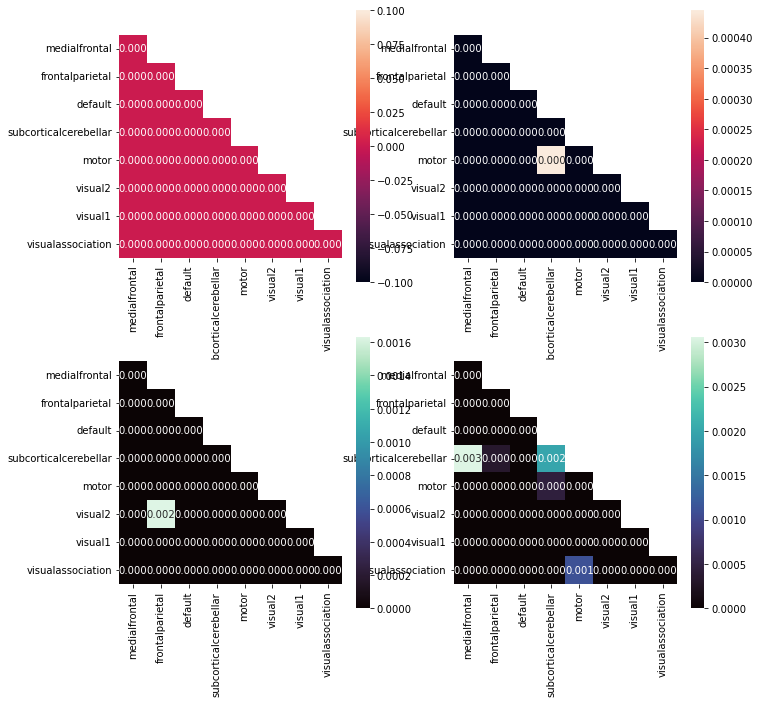

model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-NBS.csv


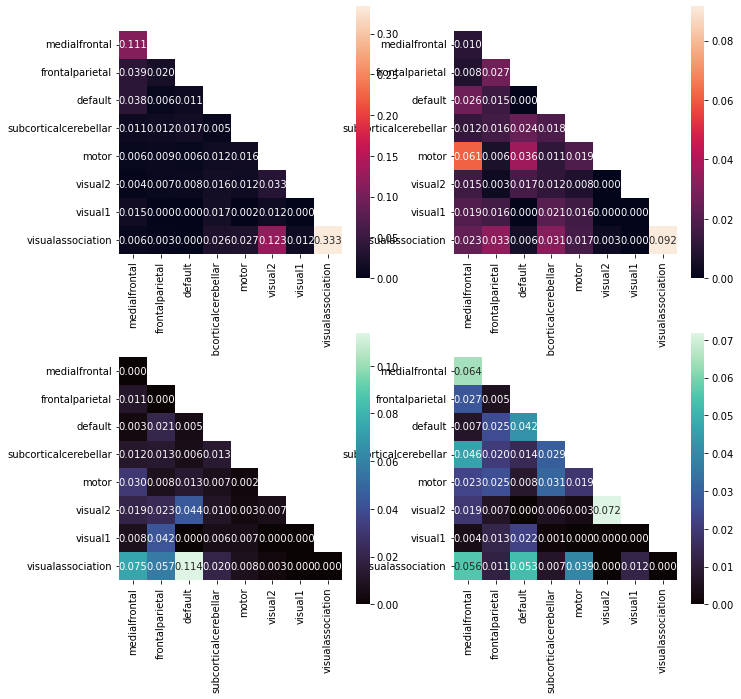

model-trialType_contrast-probe_success_datatype-edge_2ndlevel-maxT.csv


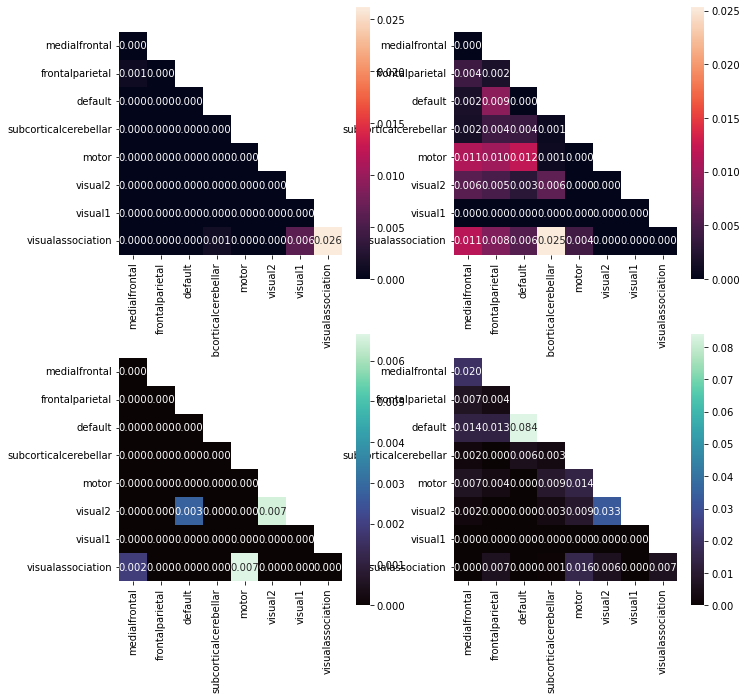

model-trialType_contrast-probe_success_datatype-edge_2ndlevel-NBS.csv


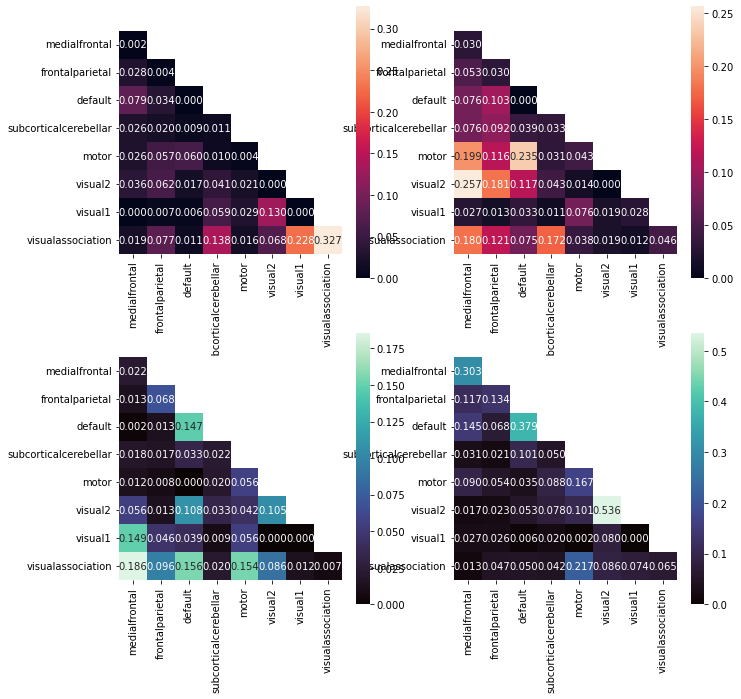

model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-maxT.csv


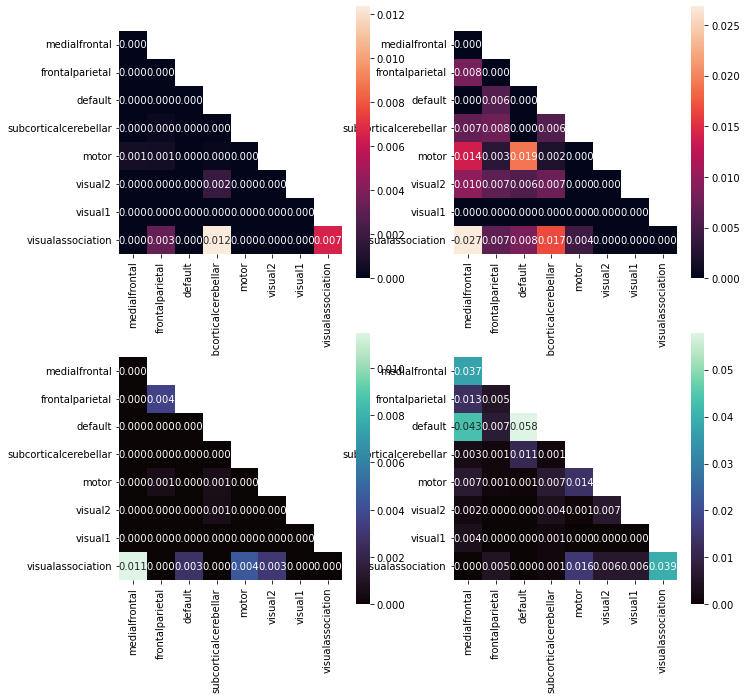

model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-NBS.csv


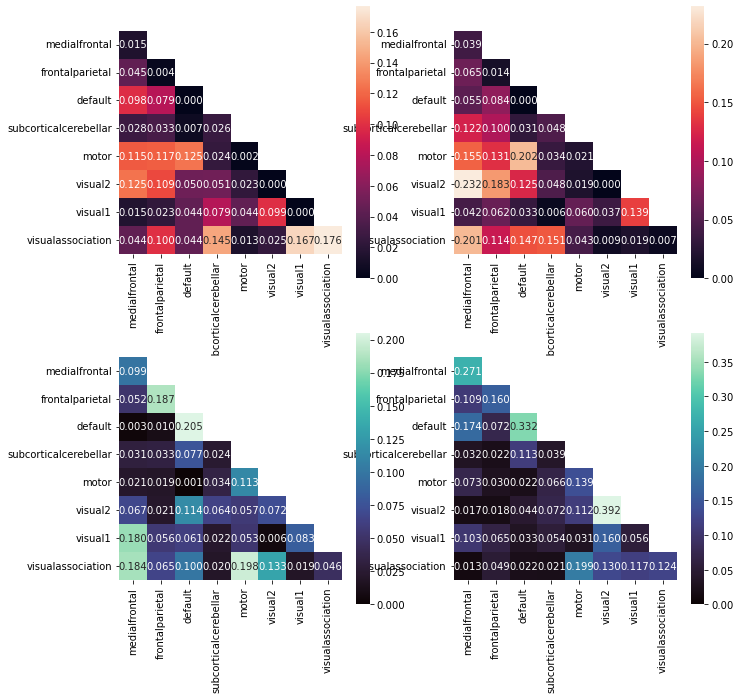

model-VTCcorr_contrast-VTCcorr_datatype-edge_2ndlevel-maxT.csv


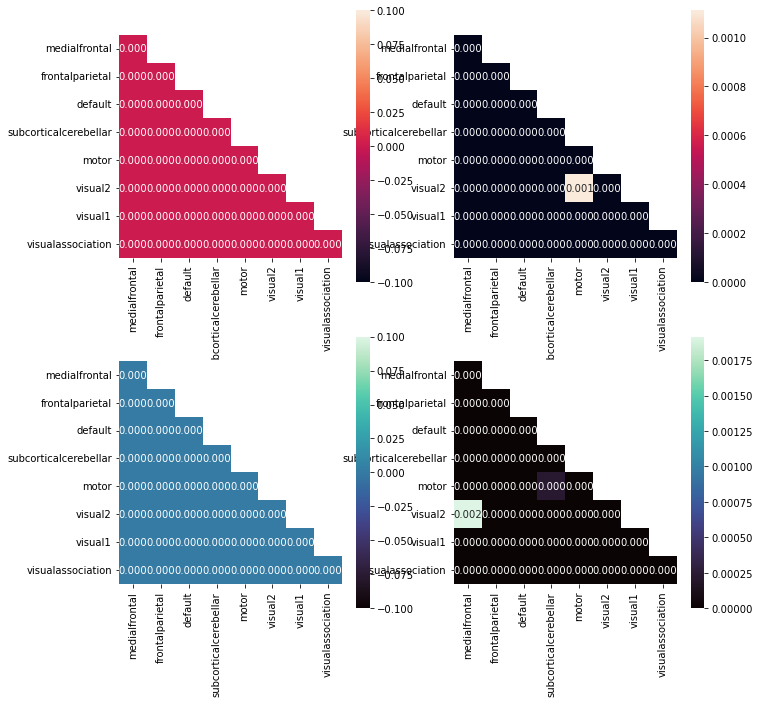

model-VTCcorr_contrast-VTCcorr_datatype-edge_2ndlevel-NBS.csv


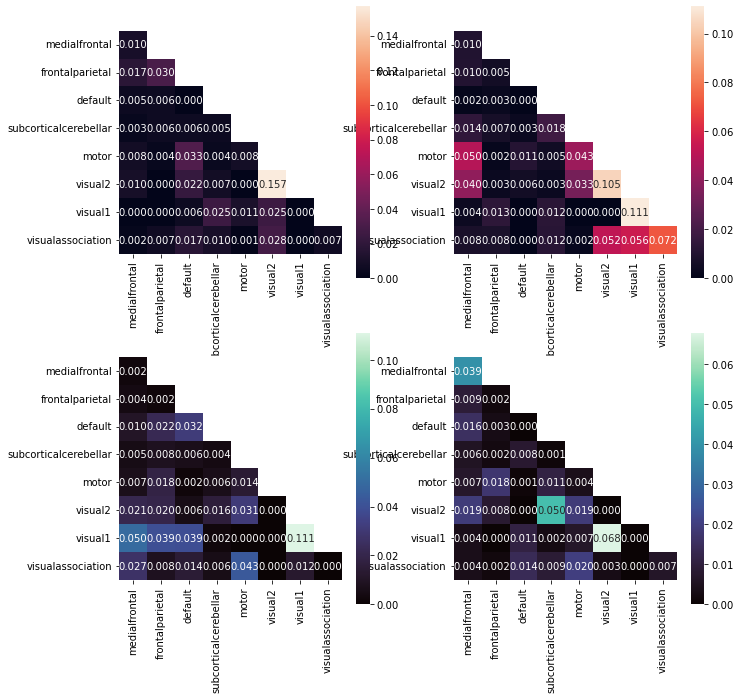

model-VTC_convolved_contrast-vtc_datatype-edge_2ndlevel-maxT.csv


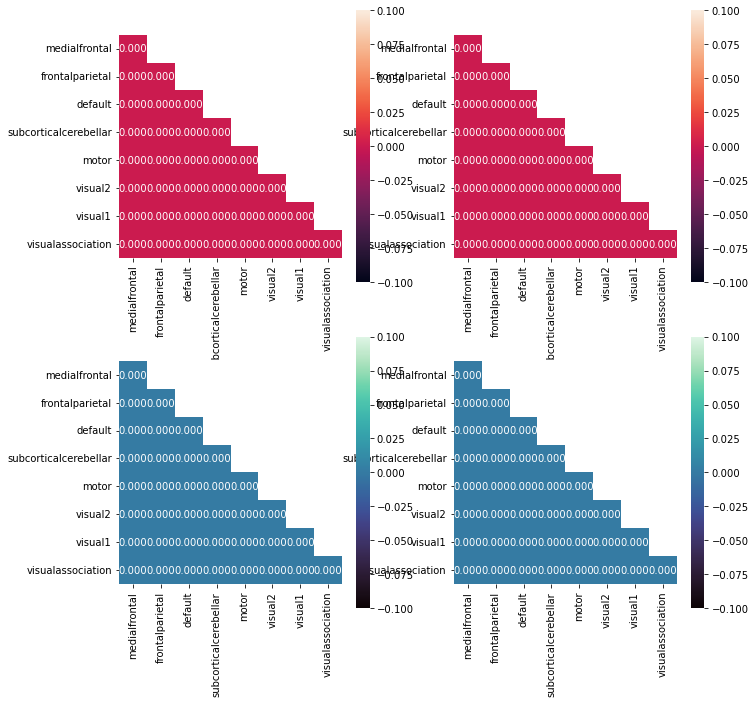

model-VTC_convolved_contrast-vtc_datatype-edge_2ndlevel-NBS.csv


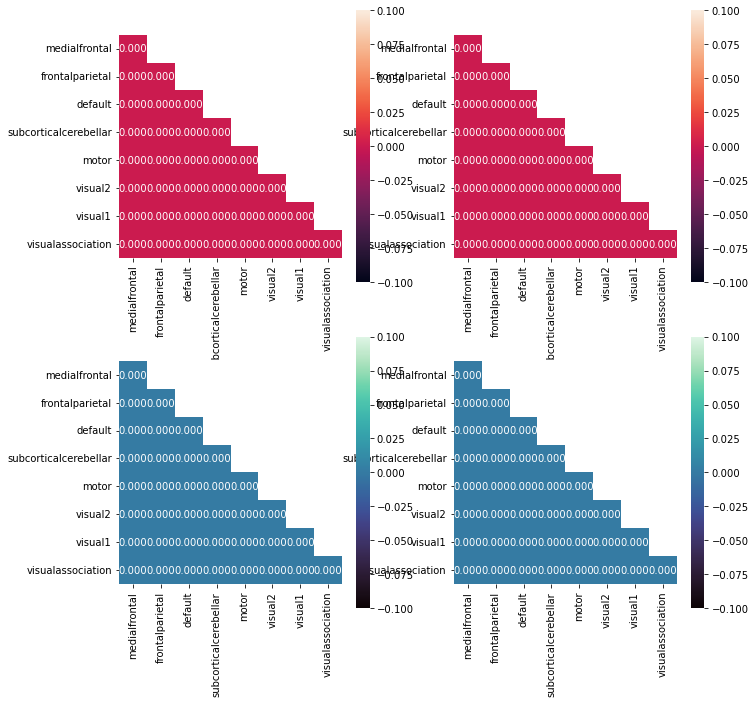

model-trialType_contrast-common_fail_datatype-edge_2ndlevel-maxT.csv


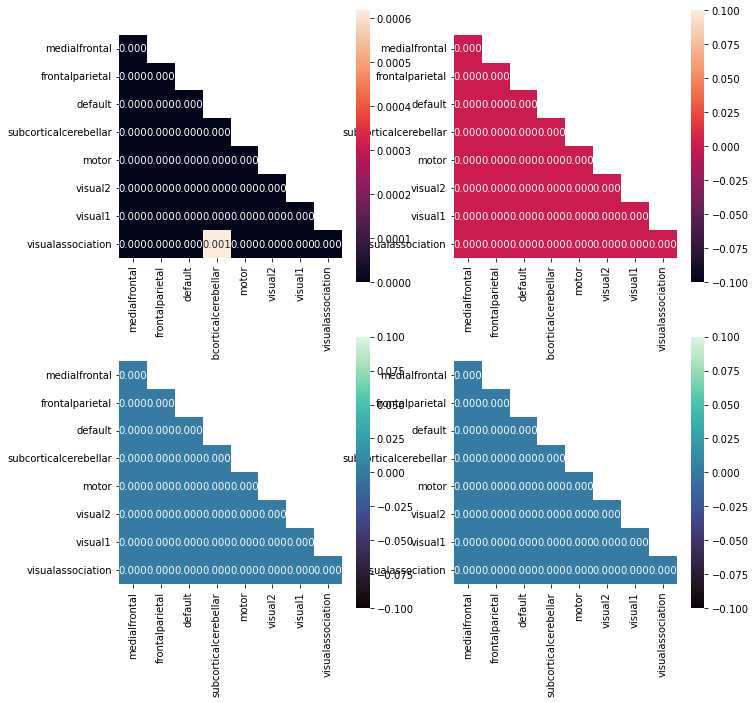

model-trialType_contrast-common_fail_datatype-edge_2ndlevel-NBS.csv


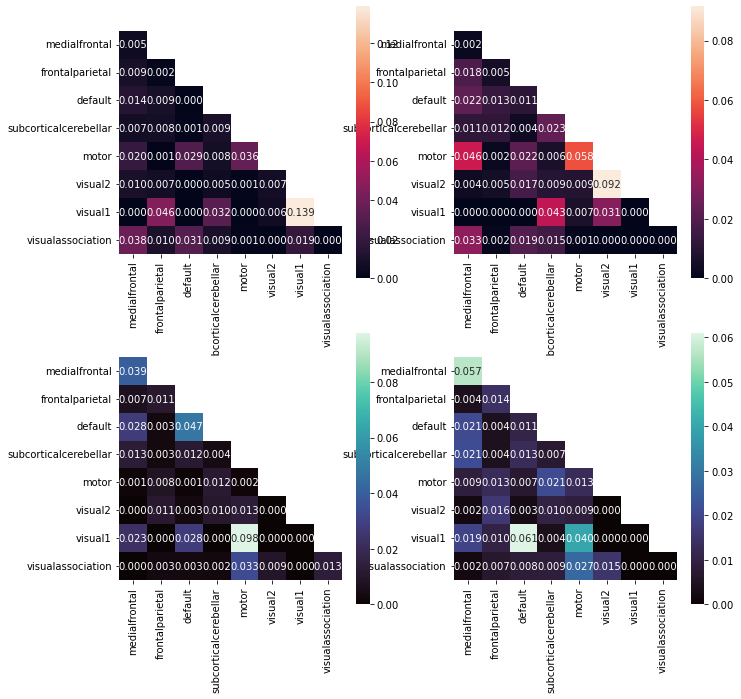

model-trialPrecursor_datatype-edge_2ndlevel-maxT.csv


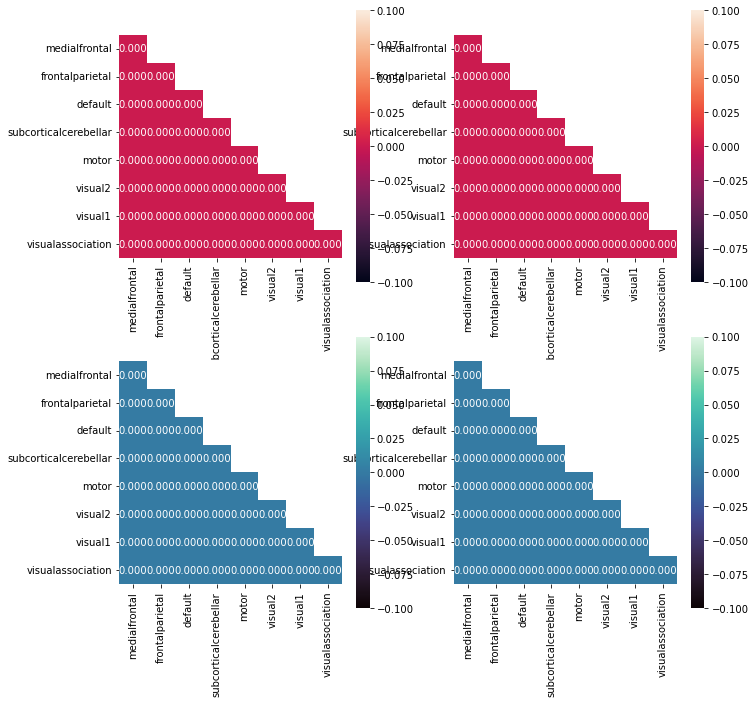

model-trialPrecursor_datatype-edge_2ndlevel-NBS.csv


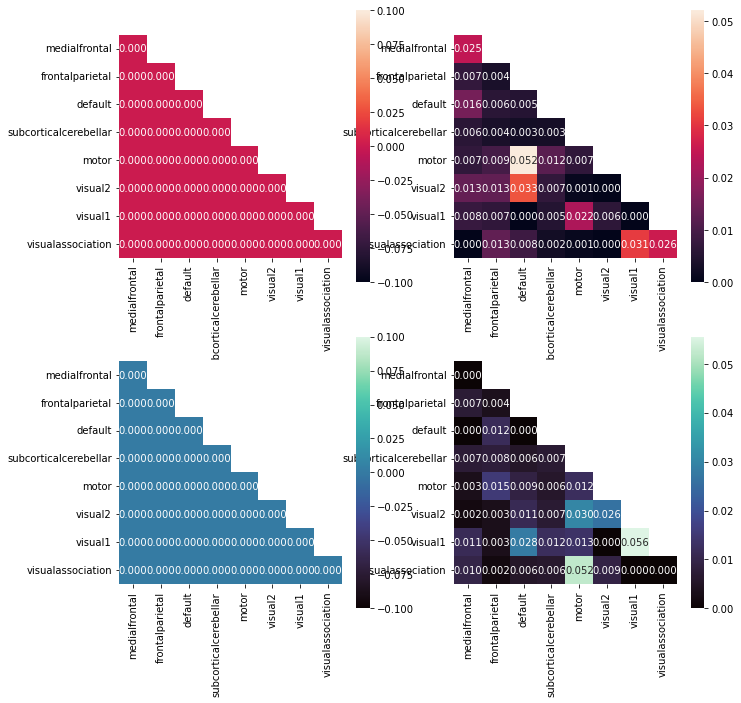

model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv


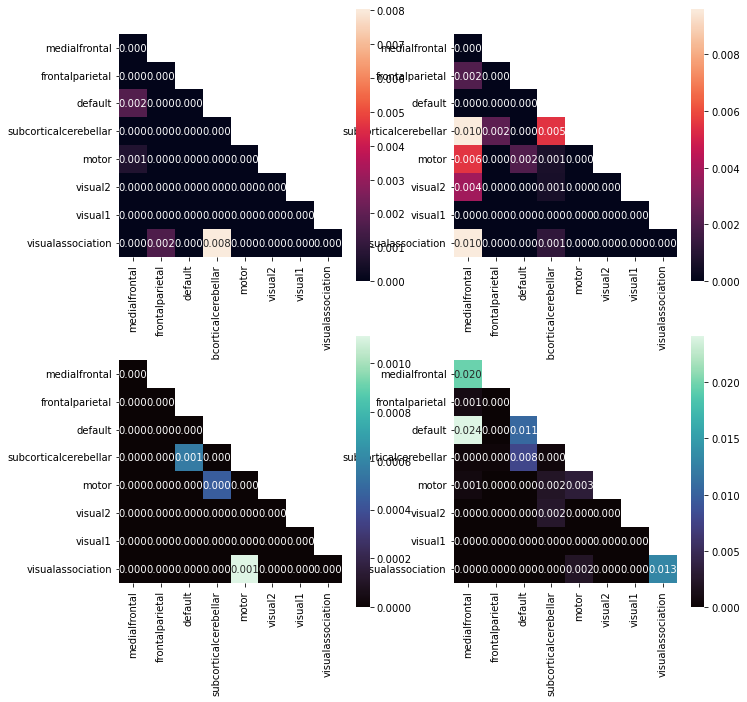

model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-NBS.csv


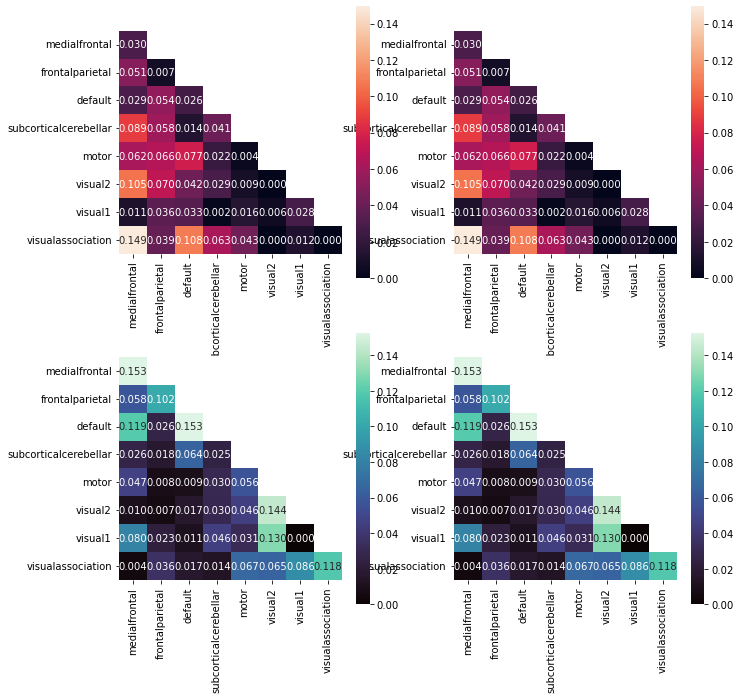

In [ ]:
for r, res in enumerate(overlapping_results):
    for i, method in enumerate(["maxT", "NBS"]):
        res_mat = mats[i, r]
        
        fig, axes = plt.subplots(2,2, figsize=(11,11))  
        
        for k, curr_mat in enumerate([res_mat, res_mat.T]):
            
            pos_condensed_mat = np.full((8,8), np.nan)
            neg_condensed_mat = np.full((8,8), np.nan)
            for i in np.unique(ordered_networks):
                for j in np.unique(ordered_networks):
                    curr_idx = (ordered_networks[ridx]==i)*(ordered_networks[cidx]==j)
                    if curr_idx.sum(): # if there are values for this order
                        curr_edges = curr_mat[ridx[curr_idx], cidx[curr_idx]] 
                        pos_count = np.sum(curr_edges > 0)
                        neg_count = np.sum(curr_edges < 0)
                        n_edges = len(curr_edges)

                        pos_condensed_mat[i-1, j-1] = pos_count/n_edges
                        neg_condensed_mat[i-1, j-1] = neg_count/n_edges
                        
                        
            _ = sns.heatmap(pos_condensed_mat, annot=True, vmin=0, fmt=".3f", square=True, ax=axes[0, k], xticklabels=network_names, yticklabels=network_names)
            _ = sns.heatmap(neg_condensed_mat, annot=True, vmin=0, fmt=".3f", cmap='mako', square=True, ax=axes[1, k], xticklabels=network_names, yticklabels=network_names)
            
        print(res.replace("maxT", method))
        plt.show()
        plt.close()
                    

# Compressed Overlap
## Lower - > increase connections
## upper - > decreased connections

In [ ]:
from matplotlib.colors import ListedColormap

model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-maxT.csv


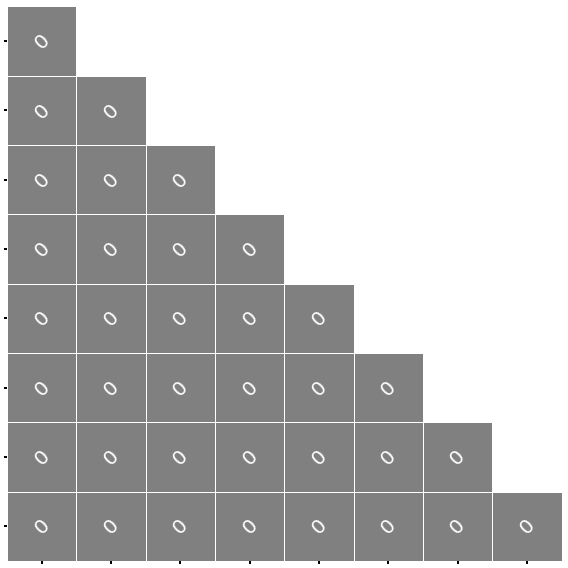

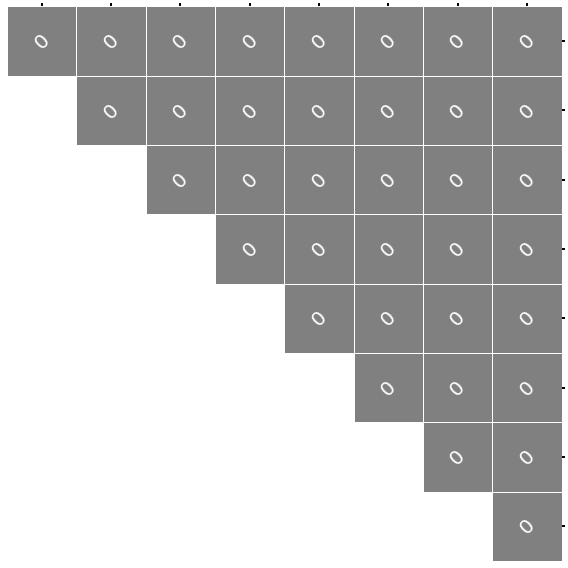

model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-NBS.csv


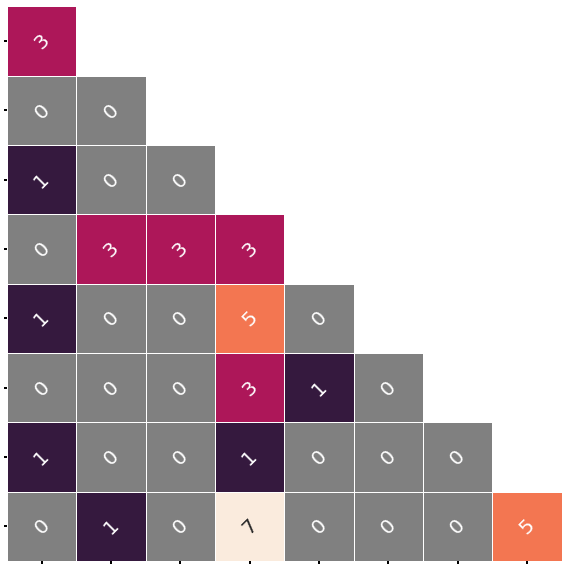

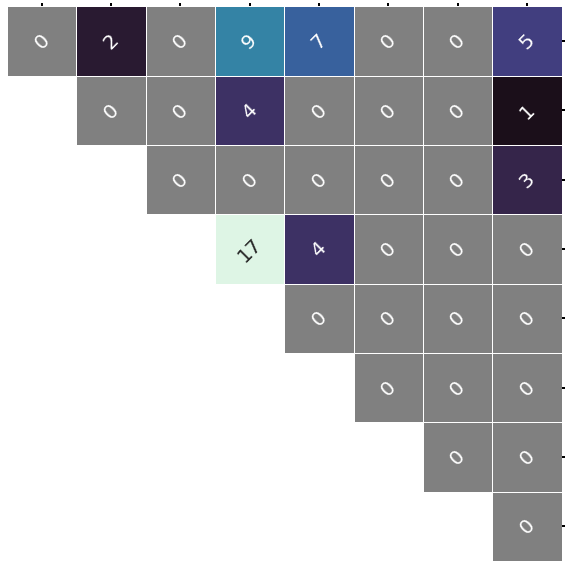

model-trialType_contrast-probe_success_datatype-edge_2ndlevel-maxT.csv


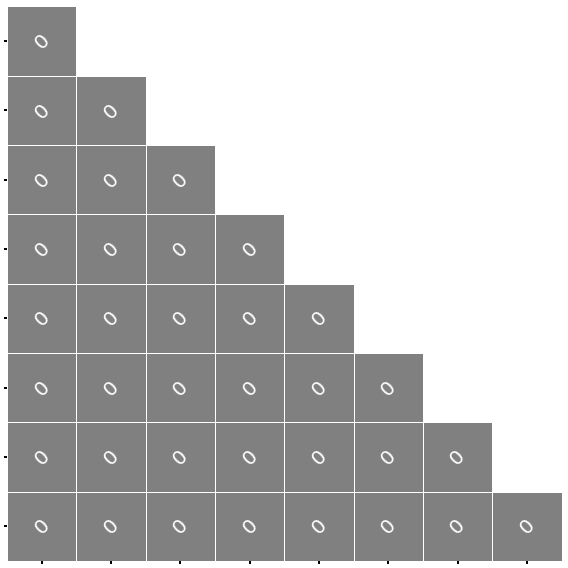

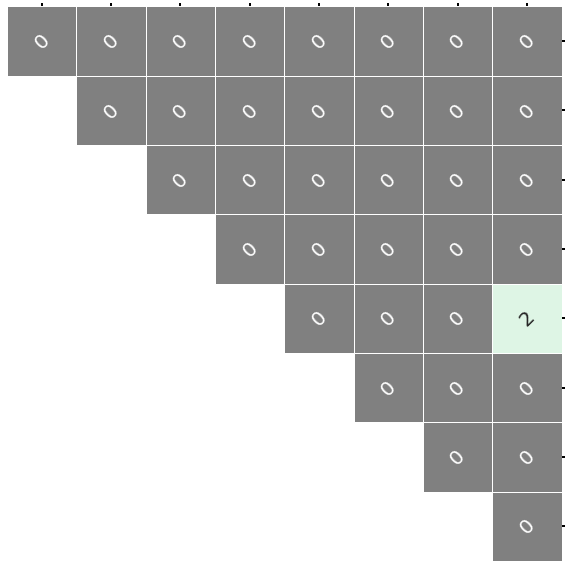

model-trialType_contrast-probe_success_datatype-edge_2ndlevel-NBS.csv


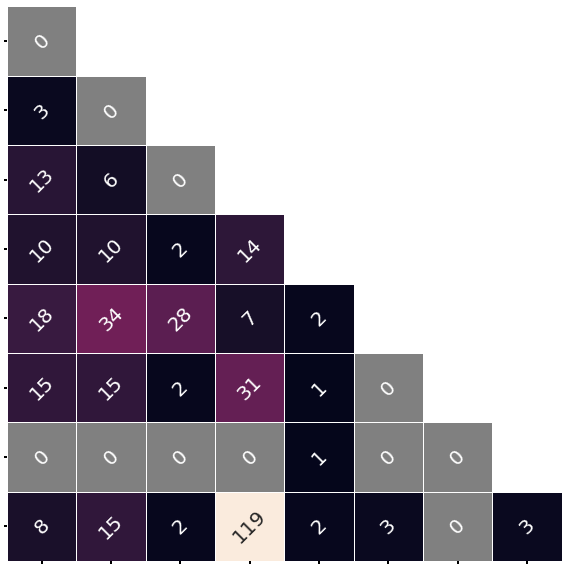

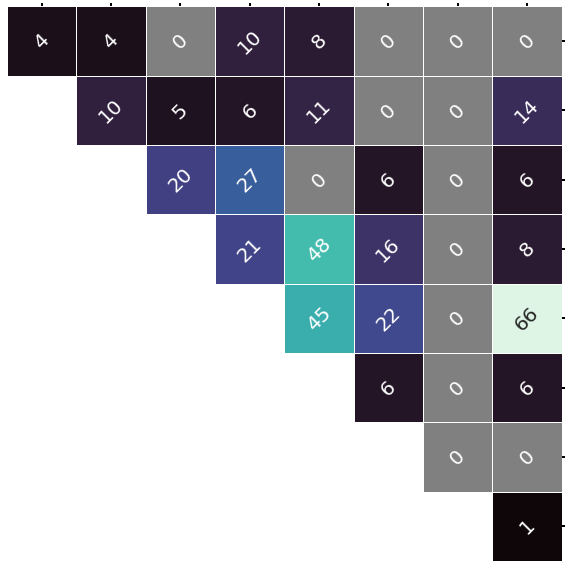

model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-maxT.csv


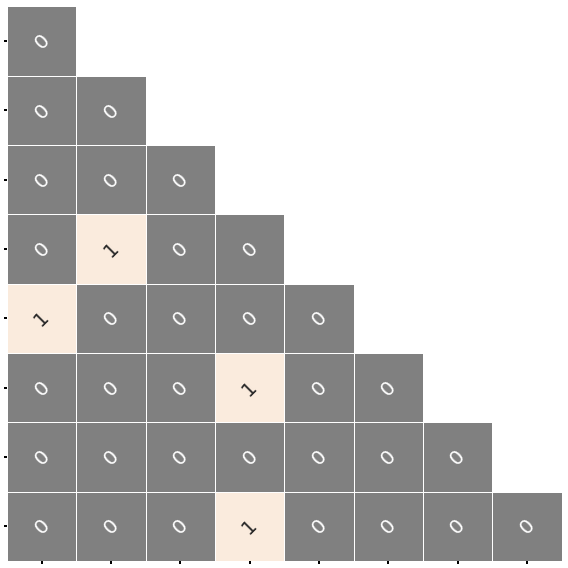

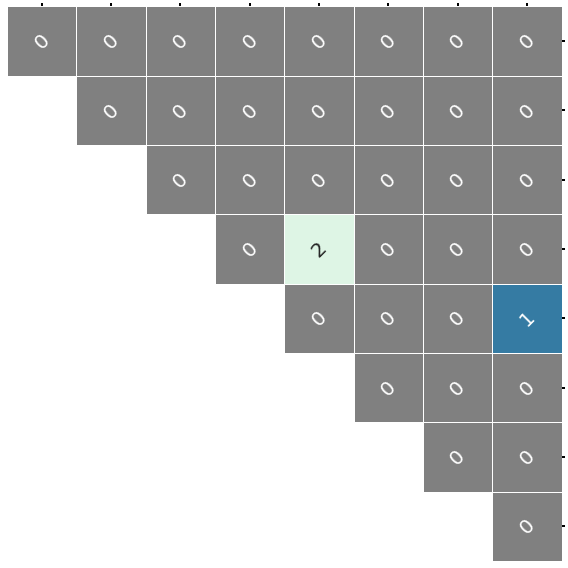

model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-NBS.csv


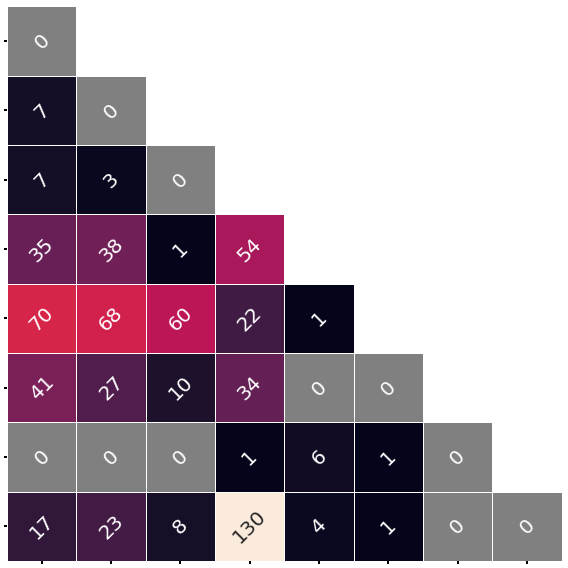

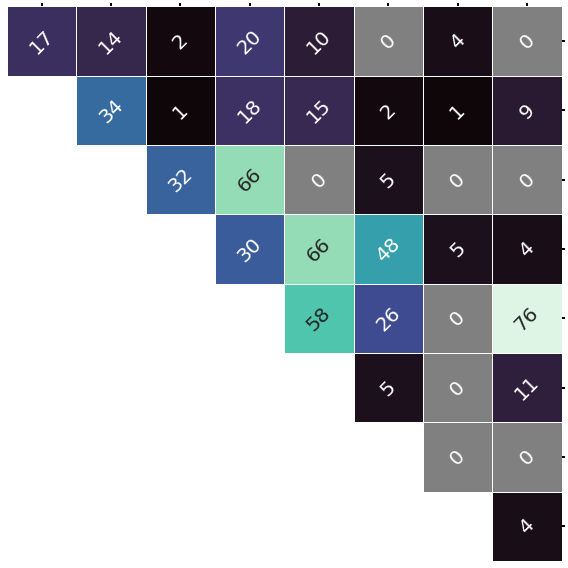

model-VTCcorr_contrast-VTCcorr_datatype-edge_2ndlevel-maxT.csv


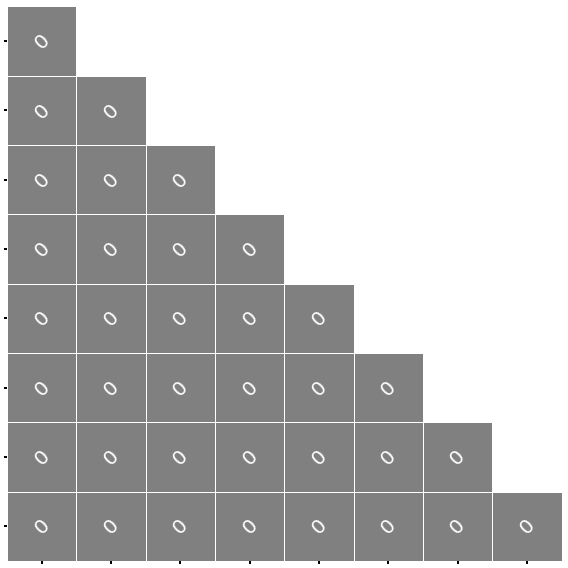

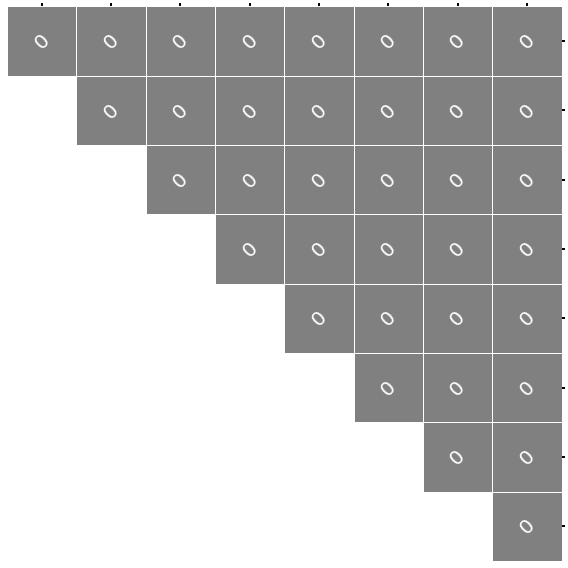

model-VTCcorr_contrast-VTCcorr_datatype-edge_2ndlevel-NBS.csv


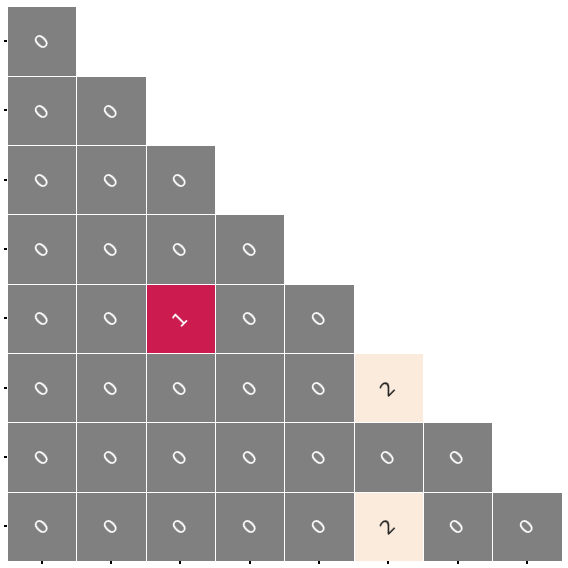

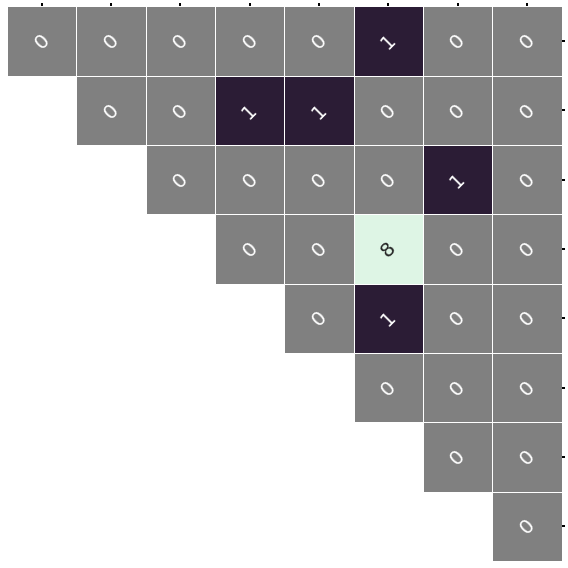

model-VTC_convolved_contrast-vtc_datatype-edge_2ndlevel-maxT.csv


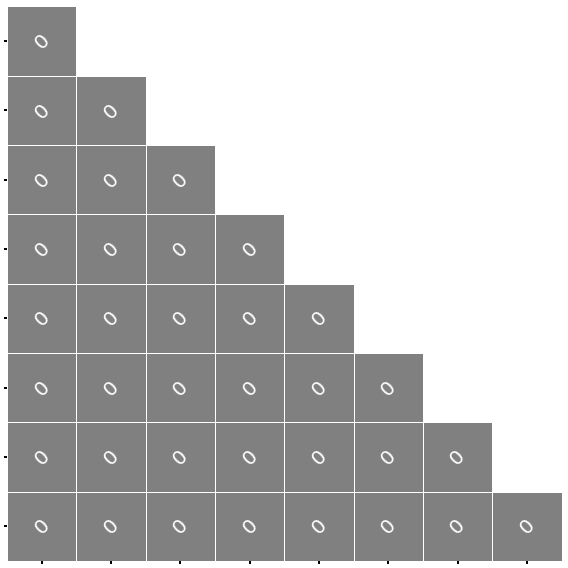

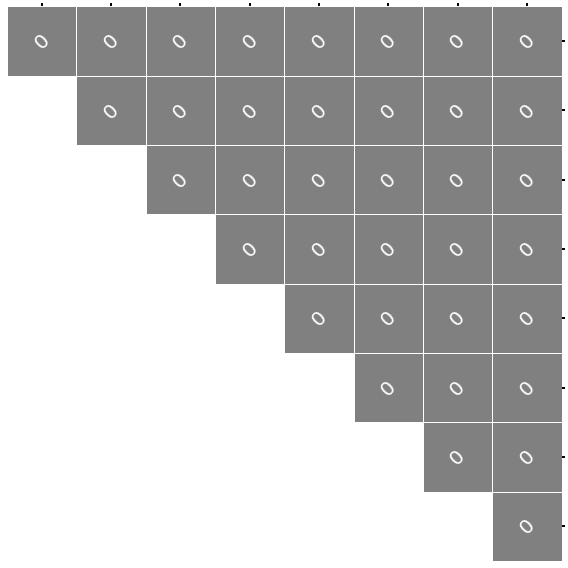

model-VTC_convolved_contrast-vtc_datatype-edge_2ndlevel-NBS.csv


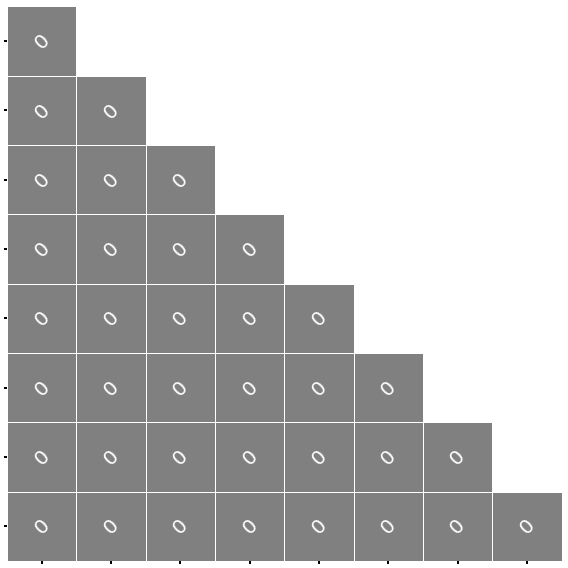

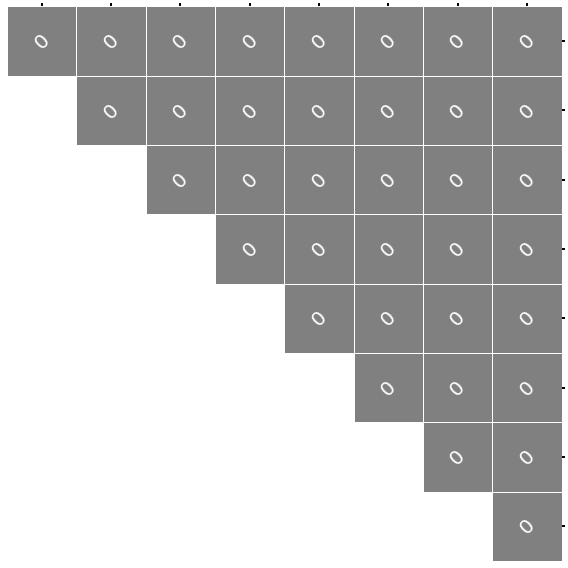

model-trialType_contrast-common_fail_datatype-edge_2ndlevel-maxT.csv


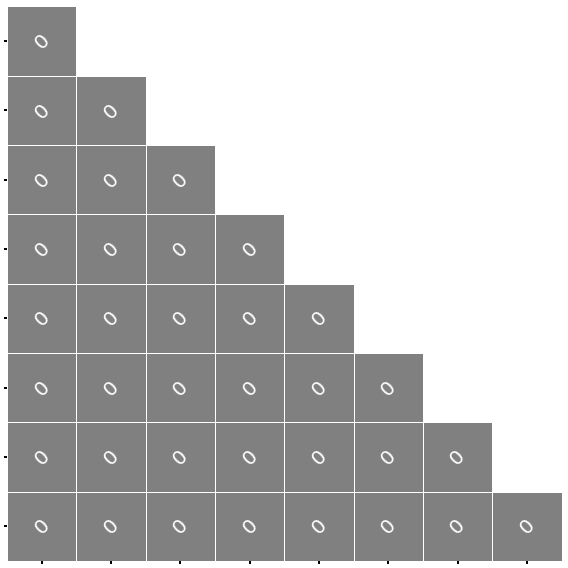

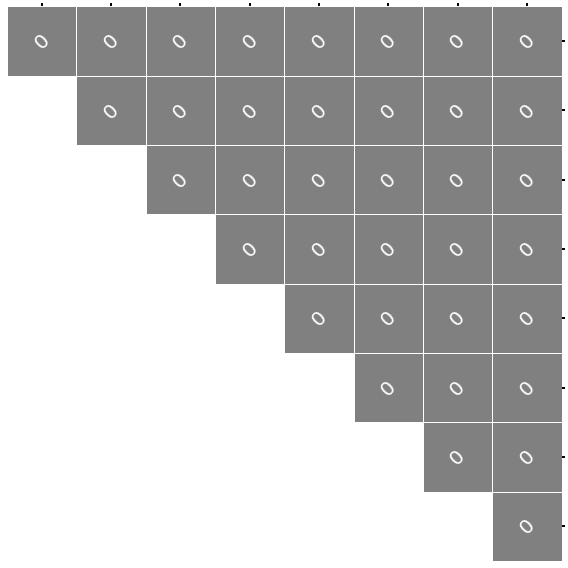

model-trialType_contrast-common_fail_datatype-edge_2ndlevel-NBS.csv


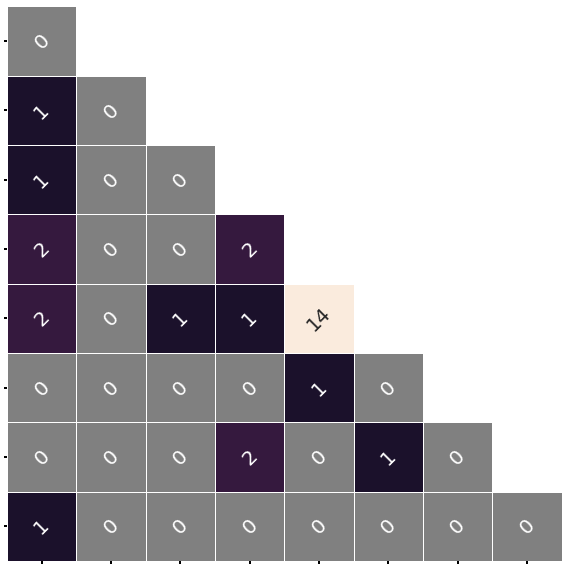

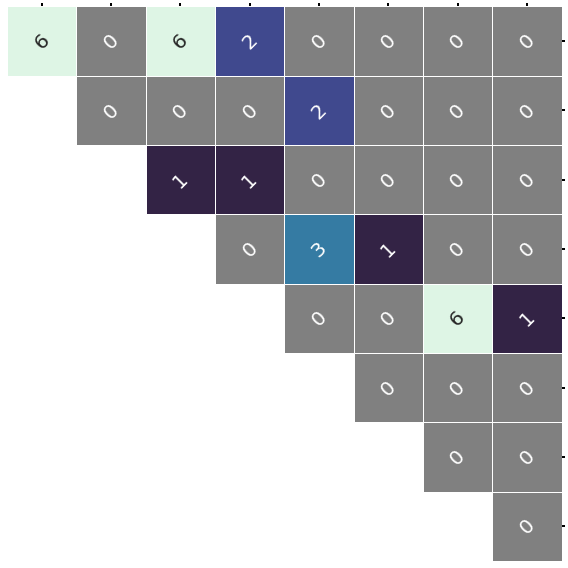

model-trialPrecursor_datatype-edge_2ndlevel-maxT.csv


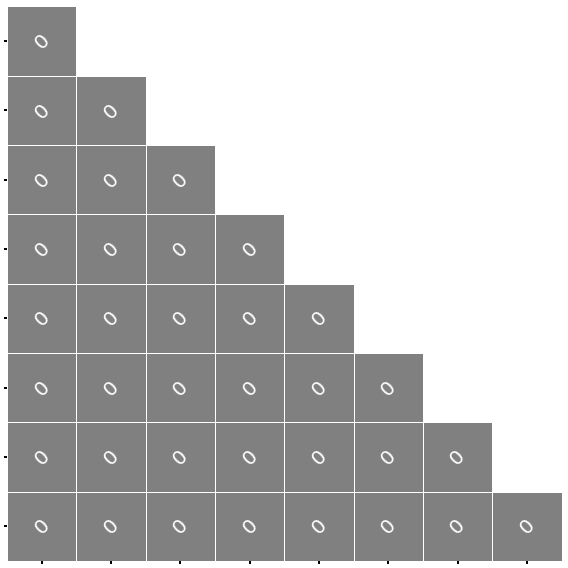

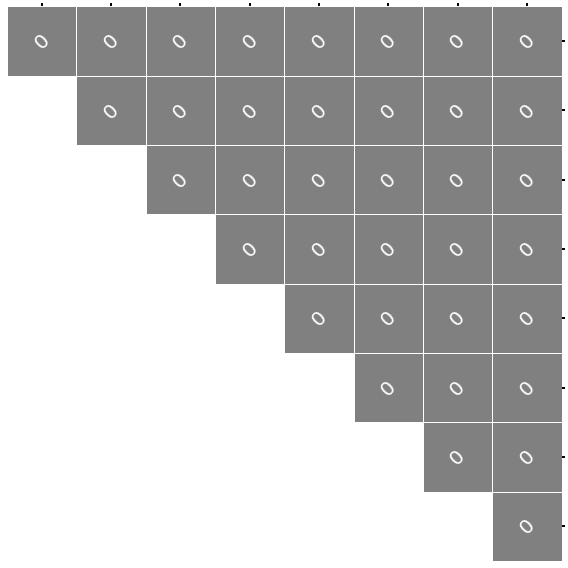

model-trialPrecursor_datatype-edge_2ndlevel-NBS.csv


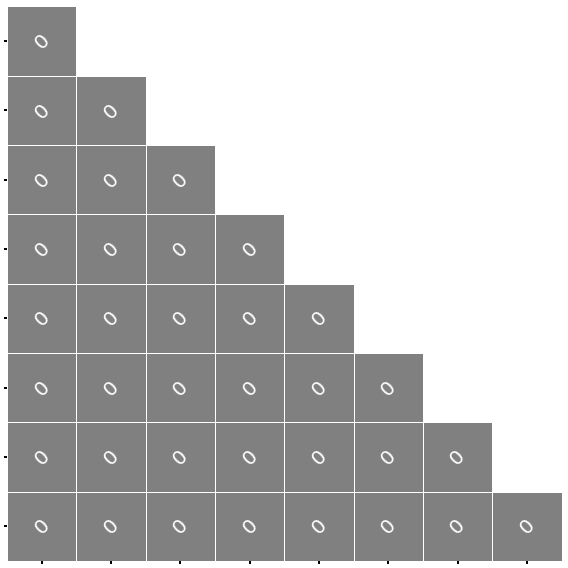

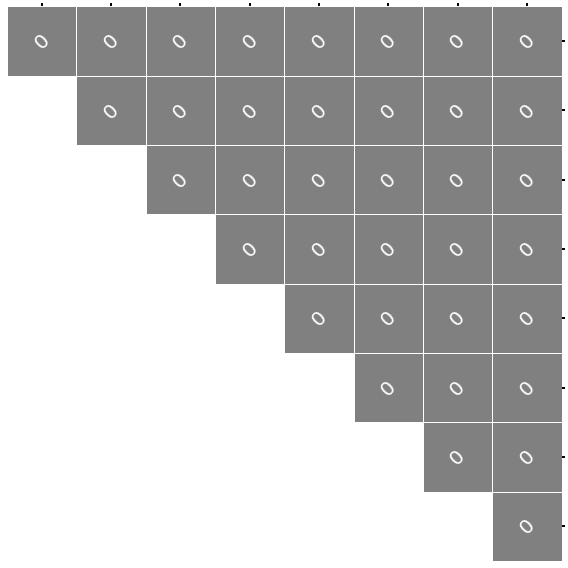

model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv


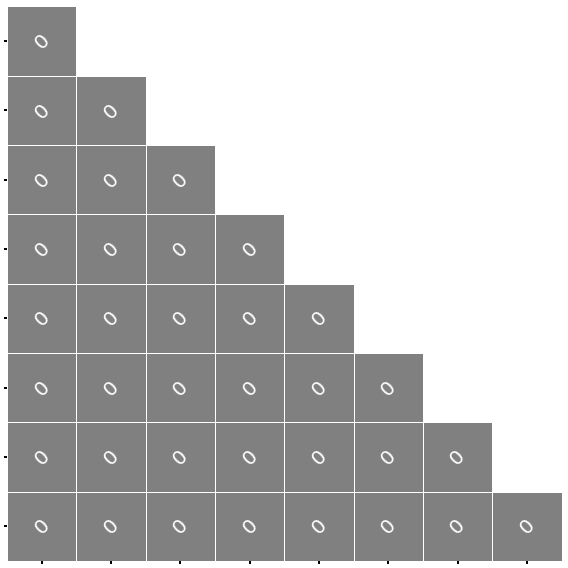

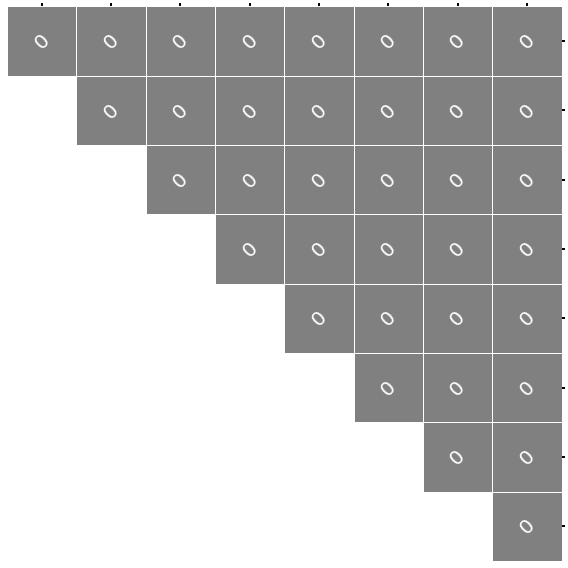

model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-NBS.csv


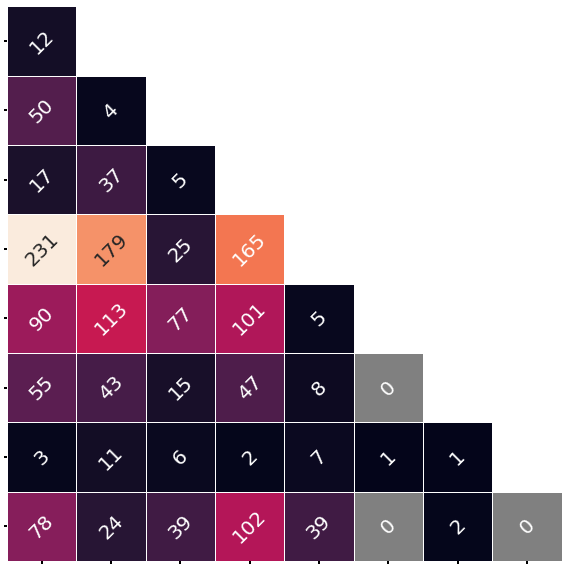

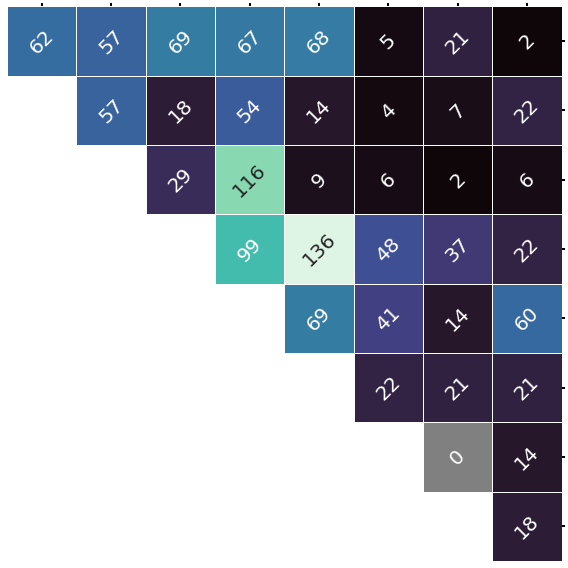

In [ ]:
for r, res in enumerate(overlapping_results):
    for i, method in enumerate(["maxT", "NBS"]):
        res_mat = mats[i, r]
        
        # for k, curr_mat in enumerate([res_mat, res_mat.T]):
            
        pos_condensed_mat = np.full((8,8), np.nan)
        neg_condensed_mat = np.full((8,8), np.nan)
        for i in np.unique(ordered_networks):
            for j in np.unique(ordered_networks):
                curr_idx = (ordered_networks[ridx]==i)*(ordered_networks[cidx]==j)
                if curr_idx.sum(): # if there are values for this order
                    curr_edges_d1 = res_mat[ridx[curr_idx], cidx[curr_idx]]
                    curr_edges_d2 = res_mat.T[ridx[curr_idx], cidx[curr_idx]] #dataset 2 is in the upper triangle, need to transpose


                    pos_count = np.sum( (curr_edges_d1 > 0)*(curr_edges_d2 > 0) )
                    neg_count = np.sum( (curr_edges_d1 < 0)*(curr_edges_d2 < 0) )

                    pos_condensed_mat[i-1, j-1] = pos_count
                    neg_condensed_mat[i-1, j-1] = neg_count
        
        
        print(res.replace("maxT", method))
        for signed_mat, sign_name, cmap in [(pos_condensed_mat, 'pos', 'rocket'), (neg_condensed_mat.T, 'neg', 'mako')]:
            
            fig, ax = plt.subplots(1,1, figsize=(8,8))  
            ax = sns.heatmap(signed_mat, annot=True, vmin=0, fmt=".0f", cmap=cmap, square=True, ax=ax,
                             xticklabels=network_names, yticklabels=network_names, linecolor='white', linewidths=0.5,
                             cbar=False, annot_kws={'rotation': 45, 'fontsize': 20})
            sns.heatmap(signed_mat==0, cmap=ListedColormap(['gray']), linecolor='white', linewidths=0.5,
                square=True, cbar=False, mask=(signed_mat != 0), ax=ax, annot=False)

            if sign_name=='neg':
                ax.xaxis.tick_top()
                ax.yaxis.tick_right()
            ax.tick_params(width=2, length=3)
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            
            plt.tight_layout()
            plt.savefig(f"results/figures/condensedHeatmap_{sign_name}Connections_{res.replace('maxT', method).replace('csv', 'png')}", bbox_inches="tight", dpi=150, transparent=True)

            plt.show()
            plt.close()
        
#         ax = sns.heatmap(neg_condensed_mat, annot=True, vmin=0, fmt=".0f", cmap='mako', square=True, ax=axes[1], xticklabels=network_names, yticklabels=network_names, linecolor='white', linewidths=0.5, cbar=False, annot_kws={'rotation': 45, 'fontsize': 20})
#         sns.heatmap(neg_condensed_mat==0, cmap=ListedColormap(['gray']), linecolor='white', linewidths=0.5,
#             square=True, cbar=False, mask=(neg_condensed_mat != 0), ax=ax, annot=False)
        
#         ax.tick_params(width=2, length=3)
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
        
        
                    

### Trial Precursor, NBS, dataset 2 only (for supp fig)

In [ ]:
i = 1
method = 'NBS'
r = 7
res = overlapping_results[7]
res

'model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv'

In [ ]:
res_mat = mats[i, r]  # get NBS results
res_mat[ridx, cidx] = res_mat.T[ridx, cidx]  # make it all dataset 2

model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-NBS.csv


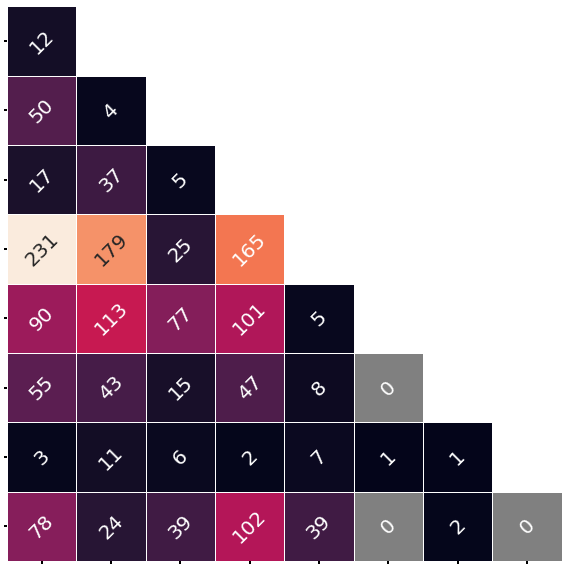

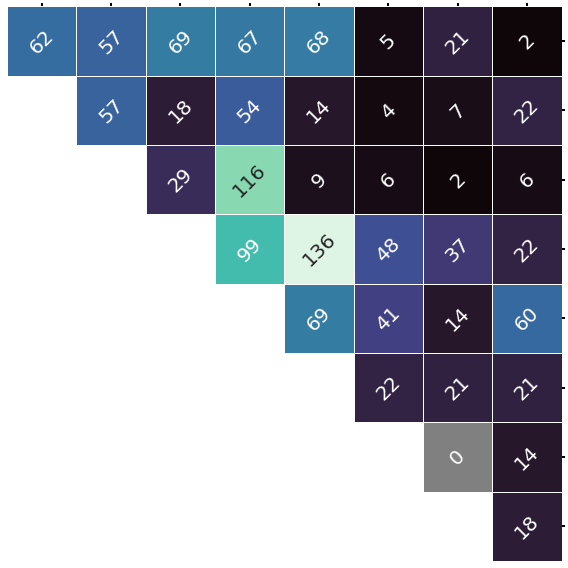

In [ ]:
pos_condensed_mat = np.full((8,8), np.nan)
neg_condensed_mat = np.full((8,8), np.nan)
for i in np.unique(ordered_networks):
    for j in np.unique(ordered_networks):
        curr_idx = (ordered_networks[ridx]==i)*(ordered_networks[cidx]==j)
        if curr_idx.sum(): # if there are values for this order
            curr_edges_d1 = res_mat[ridx[curr_idx], cidx[curr_idx]]
            curr_edges_d2 = res_mat.T[ridx[curr_idx], cidx[curr_idx]] #dataset 2 is in the upper triangle, need to transpose


            pos_count = np.sum( (curr_edges_d1 > 0)*(curr_edges_d2 > 0) )
            neg_count = np.sum( (curr_edges_d1 < 0)*(curr_edges_d2 < 0) )

            pos_condensed_mat[i-1, j-1] = pos_count
            neg_condensed_mat[i-1, j-1] = neg_count


print(res.replace("maxT", method))
for signed_mat, sign_name, cmap in [(pos_condensed_mat, 'pos', 'rocket'), (neg_condensed_mat.T, 'neg', 'mako')]:

    fig, ax = plt.subplots(1,1, figsize=(8,8))  
    ax = sns.heatmap(signed_mat, annot=True, vmin=0, fmt=".0f", cmap=cmap, square=True, ax=ax,
                     xticklabels=network_names, yticklabels=network_names, linecolor='white', linewidths=0.5,
                     cbar=False, annot_kws={'rotation': 45, 'fontsize': 20})
    sns.heatmap(signed_mat==0, cmap=ListedColormap(['gray']), linecolor='white', linewidths=0.5,
        square=True, cbar=False, mask=(signed_mat != 0), ax=ax, annot=False)

    if sign_name=='neg':
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
    ax.tick_params(width=2, length=3)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.tight_layout()
    
    plt.savefig(f"results/figures/condensedHeatmap_{sign_name}Connections_contrast-TrialPrecursor_secondlevel-NBS_dataset-2_ONLY.png", bbox_inches="tight", dpi=150, transparent=True)

    plt.show()
    plt.close()

# VTC corr * CPM overlap, dataset 2 NBS

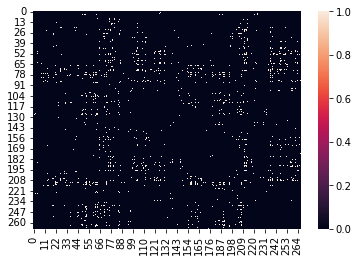

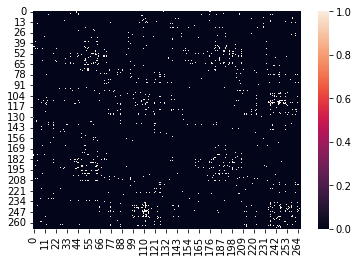

In [ ]:
CPM_mat = loadmat('saCPM.mat')

high_edges = CPM_mat['high_attention_mask']
_ = sns.heatmap(high_edges)
plt.show()

low_edges = CPM_mat['low_attention_mask']
_ = sns.heatmap(low_edges)
plt.show()

In [ ]:
overlapping_results[3]

'model-VTCcorr_contrast-VTCcorr_datatype-edge_2ndlevel-maxT.csv'

In [ ]:
dset_res = pd.read_csv(path.join(secondlevel_dir % '2', overlapping_results[3].replace("maxT", "NBS")), header=None).values

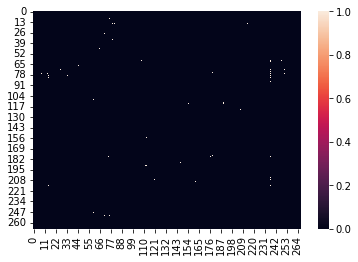

In [ ]:
_ = sns.heatmap((dset_res<0)*high_edges)

In [ ]:
np.sum((dset_res<0)*high_edges)/2

35.0

In [ ]:
np.sum((dset_res>0)*low_edges)/2

20.0

In [ ]:
49+56

105

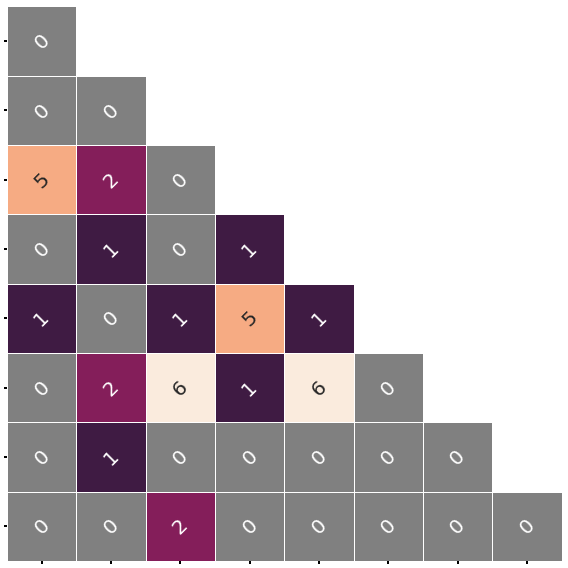

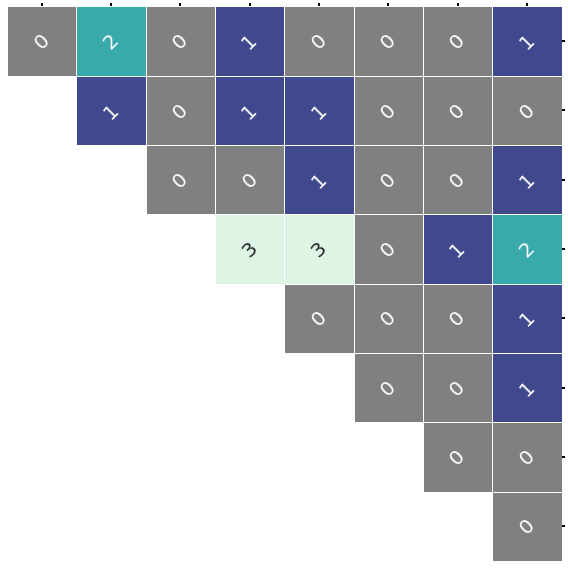

In [ ]:
pos_condensed_mat = np.full((8,8), np.nan)
neg_condensed_mat = np.full((8,8), np.nan)
for i in np.unique(ordered_networks):
    for j in np.unique(ordered_networks):
        curr_idx = (ordered_networks[ridx]==i)*(ordered_networks[cidx]==j)
        if curr_idx.sum(): # if there are values for this order
            curr_edges_d2 = dset_res[ridx[curr_idx], cidx[curr_idx]]
            curr_edges_CPM_high = high_edges[ridx[curr_idx], cidx[curr_idx]]
            curr_edges_CPM_low = low_edges[ridx[curr_idx], cidx[curr_idx]]


            high_count = np.sum( (curr_edges_d2<0)*curr_edges_CPM_high )
            low_count = np.sum( (curr_edges_d2>0)*curr_edges_CPM_low )

            pos_condensed_mat[i-1, j-1] = high_count
            neg_condensed_mat[i-1, j-1] = low_count


for signed_mat, sign_name, cmap in [(pos_condensed_mat, 'pos', 'rocket'), (neg_condensed_mat.T, 'neg', 'mako')]:

    fig, ax = plt.subplots(1,1, figsize=(8,8))  
    ax = sns.heatmap(signed_mat, annot=True, vmin=0, fmt=".0f", cmap=cmap, square=True, ax=ax,
                     xticklabels=network_names, yticklabels=network_names, linecolor='white', linewidths=0.5,
                     cbar=False, annot_kws={'rotation': 45, 'fontsize': 20})
    sns.heatmap(signed_mat==0, cmap=ListedColormap(['gray']), linecolor='white', linewidths=0.5,
        square=True, cbar=False, mask=(signed_mat != 0), ax=ax, annot=False)

    if sign_name=='neg':
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
    ax.tick_params(width=2, length=3)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.tight_layout()
    
    plt.savefig(f"results/figures/condensedHeatmap_{sign_name}Connections_contrast-VTCcorrCPMoverlap_secondlevel-NBS_dataset-2_ONLY.png", bbox_inches="tight", dpi=150, transparent=True)

    plt.show()
    plt.close()

# Looking for Edges that aren't predicted by ROIs

model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-maxT.csv
0 0 0
model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-NBS.csv
12 18 30
[200  20 127  42 137 161 218  44   9  99 139 237  33  28  34 190 192 125
 186  78 154   4 262 180 260 106 144  73  72 151  14 152 181 149 167]
[7. 5. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


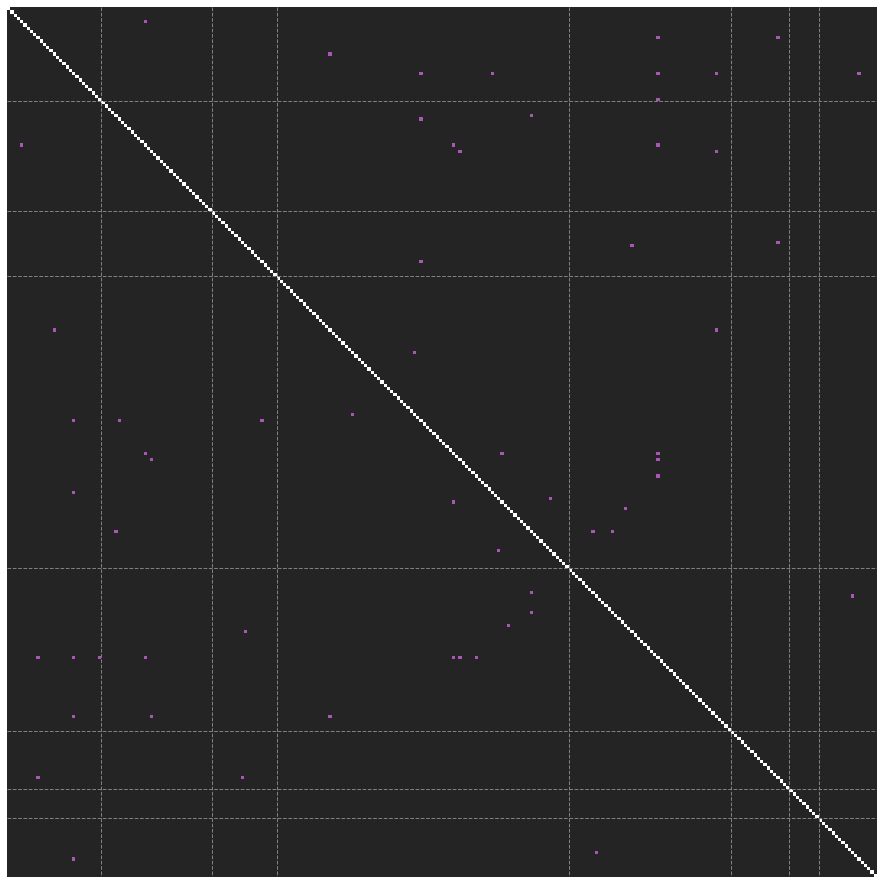

model-trialType_contrast-probe_success_datatype-edge_2ndlevel-maxT.csv
0 0 0
model-trialType_contrast-probe_success_datatype-edge_2ndlevel-NBS.csv
66 105 171
[ 45  90 180  89  82 150  84  41  33  47  24  88 155  60 245  25 176  97
 156 225 183 145   4 143  15 258  87  85 167 251  12 162  76 160  44 124
 221 148  18 218 106 179  36  26   7 175 202 197 214 126   8 117 122  71
 204 257  38  37 168  42  43 170 161  34  14  27  48 159  20 177  53  54
  32 172 103 112 220 114 115 166 178 153 165 184 181 127 199 198 137 191
 190 142 189 146 158 187 206 186 223  16  73  72 239  65 242  62  61 246
  51  46  40  35  29  28  22  74 232 133 226 229   6  91 262]
[20. 14. 12. 12. 12.  7.  7.  7.  7.  6.  6.  5.  5.  5.  5.  5.  5.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  

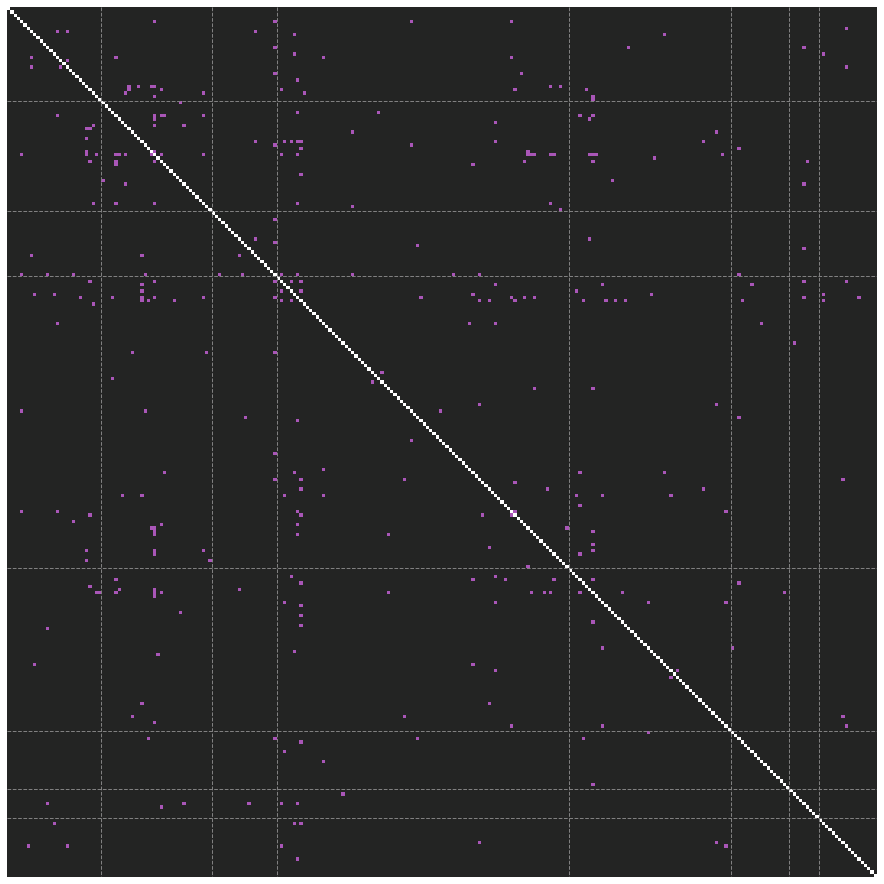

model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-maxT.csv
0 0 0
model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-NBS.csv
121 118 239
[ 82  90  45 150 183 175 158 152 148 162 218  84   7 225  74 207  54 177
  47 179  89  26  60  41 145  11 147  20 155 245  22  18  87  71 163 139
 222 192  46  44 251 180  36 263 126 260 170 185   4 146  69 258  65  31
  40 223  24  43  12 181 204  13  37  15 178  34  14 221  85 159 144 236
 191 124  97 167 160 142 198 197 106 224  94 122  73 189 184   9 187 259
 252 248  67  68  42  72  76  29  79  25 196  88 208 262 206  19  16  10
 169   8 200 138   6 199 141   5 143   3 238  32 241 121 214  70  75 166
 165 229 164 174  64 246  59  58 243 249 110 176  51  48 115 190  33 193
 186]
[20. 17. 15. 12. 11. 11. 10.  9.  9.  8.  7.  7.  7.  7.  7.  7.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  5.  5.  5.  5.  5.  5.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  

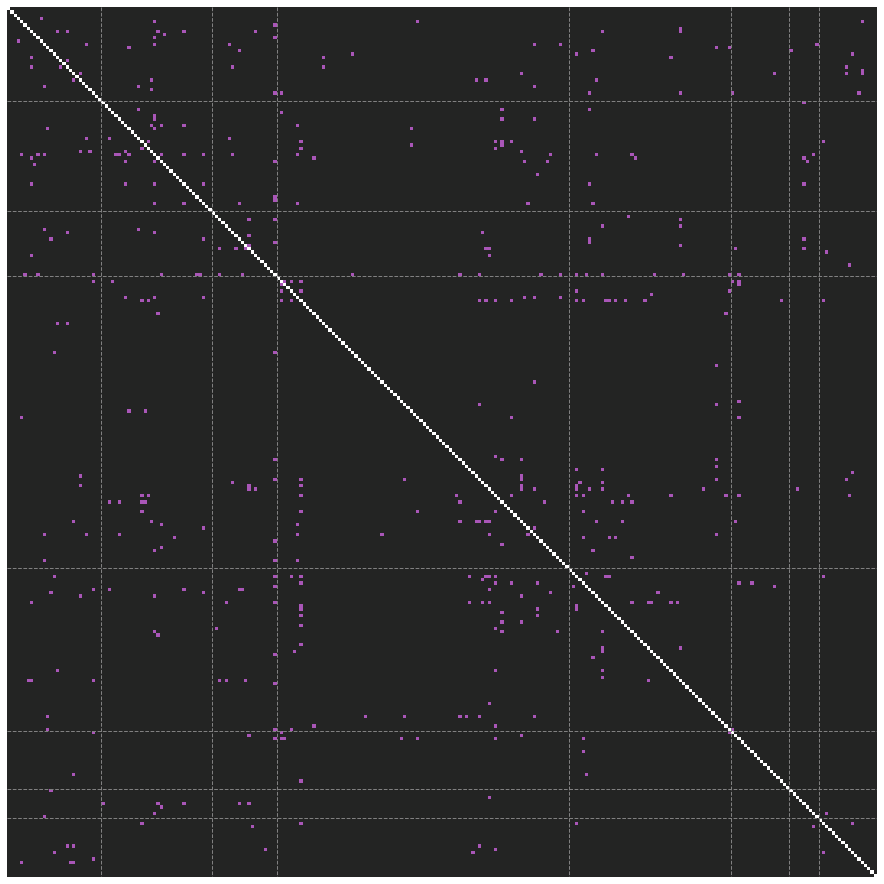

model-trialType_contrast-common_fail_datatype-edge_2ndlevel-maxT.csv
0 0 0
model-trialType_contrast-common_fail_datatype-edge_2ndlevel-NBS.csv
11 12 23
[221 144 218  88 240 196  62  25 212  34 171  99  53 232 231  52  41 181
 106 180 187  23 191 140 139 137 199  84  75 150  10 210  87 223  70 190
 157  90]
[3. 3. 3. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


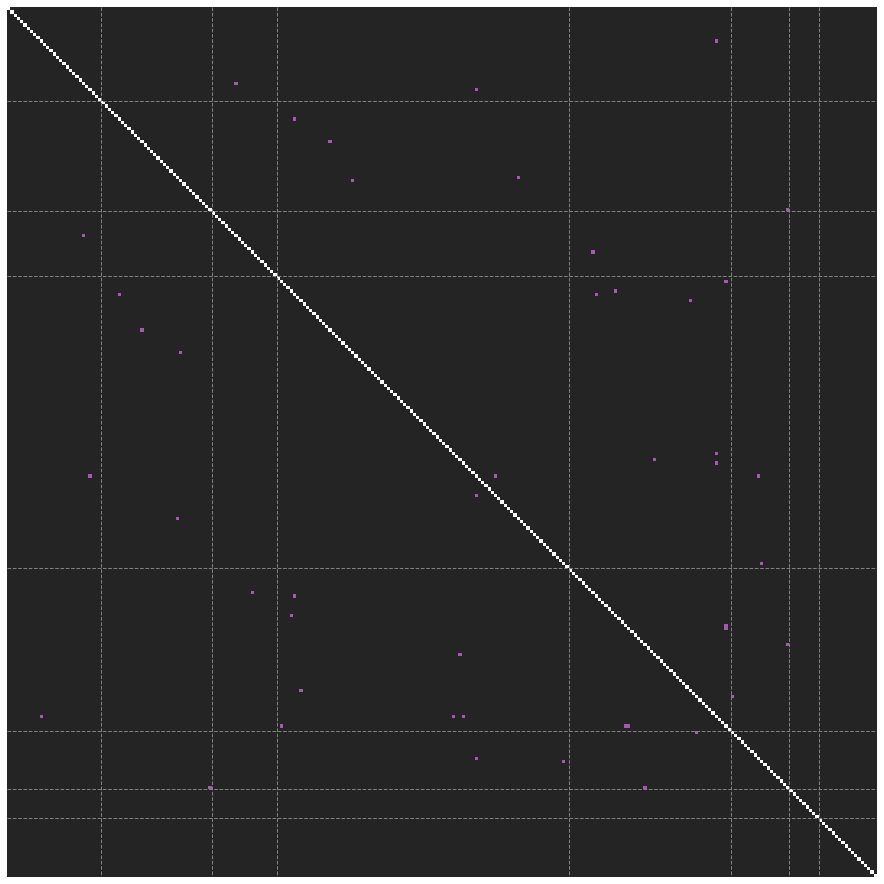

model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv
0 0 0
model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-NBS.csv
68 67 135
[ 82 207 152  11  40 162  74 218  12 183 178 139 148  65   9 150  68  44
  60  73 145  54  67  37 197 192  47 158  43  71  20  85 146 147  94 208
  72 241  69  46  45 210  55 198  41   3   4   7 174  19 200 249 141 185
 167 199 225 171 224 124 203 175 189 144 223 222  90 142 110 137  99 180
 104 181 206 186 165 164  18  26  34  58 260  42  13  59  10 245  61 248
 230 263   5  70  51  31  66]
[13. 13. 11. 10.  8.  7.  7.  7.  7.  6.  6.  6.  6.  6.  6.  6.  5.  5.
  5.  4.  4.  4.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]


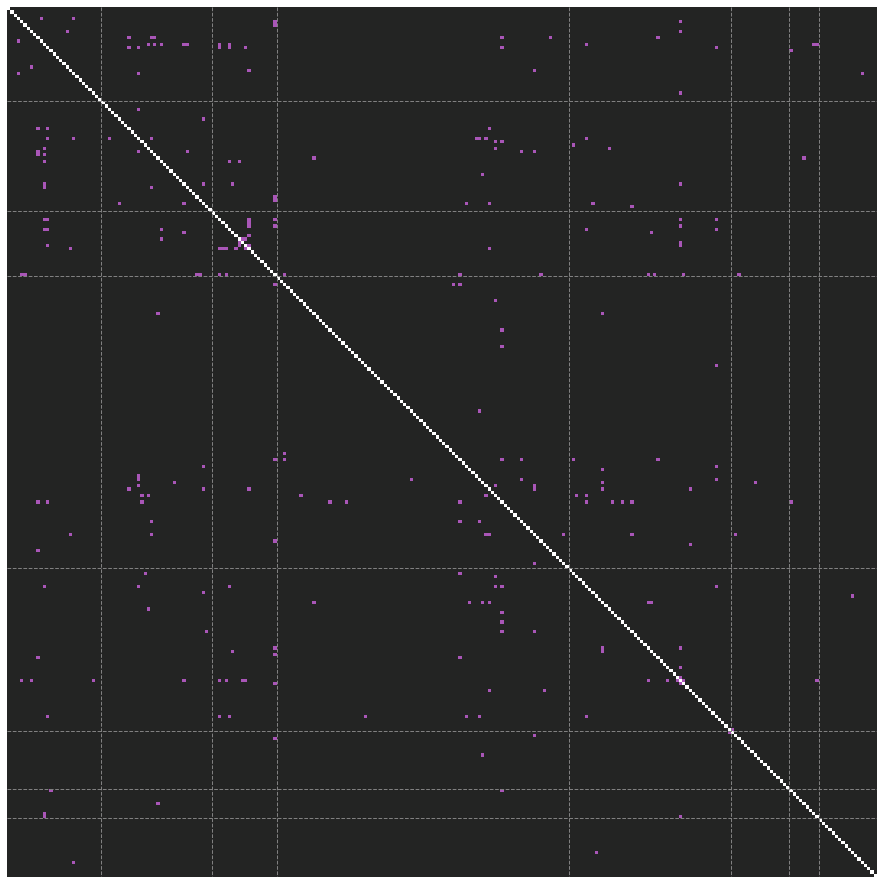

In [ ]:
mats = np.empty((len(overlapping_results), 2, 2), dtype='object')
dtypes = ['roi', 'edge']
for r, res in enumerate(overlapping_results):
    if not path.exists(path.join(secondlevel_dir % '1', res.replace('datatype-edge', 'datatype-roi')) ):
        continue
    
    for i, method in enumerate(["maxT", "NBS"]):
        curr_res = res.replace("maxT", method)

        d1_edges = pd.read_csv(path.join(secondlevel_dir % '1', curr_res), header=None).values
        d2_edges = pd.read_csv(path.join(secondlevel_dir % '2', curr_res), header=None).values

        d1_rois = pd.read_csv(path.join(secondlevel_dir % '1', curr_res.replace('edge', 'roi')), header=None).values
        d2_rois = pd.read_csv(path.join(secondlevel_dir % '2', curr_res.replace('edge', 'roi')), header=None).values

        pos_misses = ((d1_edges[ridx, cidx] > 0) * (d2_edges[ridx, cidx] > 0) * (d1_rois[ridx, cidx] == 0) * (d2_rois[ridx, cidx] == 0))
        neg_misses = ((d1_edges[ridx, cidx] < 0) * (d2_edges[ridx, cidx] < 0) * (d1_rois[ridx, cidx] == 0) * (d2_rois[ridx, cidx] == 0))
        overlapping_misses = pos_misses + neg_misses

        print(curr_res)
        print(pos_misses.sum(), neg_misses.sum(), overlapping_misses.sum())
        
        if overlapping_misses.sum():
            
            plt.figure(figsize=(16,16))
            
            miss_adj = np.full((268, 268), np.nan)
            miss_adj[ridx, cidx] = overlapping_misses
            miss_adj = miss_adj.T
            miss_adj[ridx, cidx] = overlapping_misses
            
            misses_per_roi = np.nansum(miss_adj, 0)
            roi_order = np.argsort(-misses_per_roi)
            ordered_misses = misses_per_roi[roi_order]
            print(roi_order[ordered_misses>0])
            print(ordered_misses[ordered_misses>0])
            
            ax = sns.heatmap(miss_adj*-1, square=True, center=0, cmap=sns.diverging_palette(300, 145, s=60, as_cmap=True, center='dark'), cbar=False)
            
            _ = ax.hlines(cutoffs, *ax.get_xlim(), color='gray', linewidth=1, linestyle='dashed')
            _ = ax.vlines(cutoffs, *ax.get_xlim(), color='gray', linewidth=1, linestyle='dashed')
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            ax.set_aspect("equal")
            
            plt.show()
            plt.close()

# checking what percentage of overlapping edges were missed by ROI

In [ ]:
for r, res in enumerate(overlapping_results):
    if not path.exists(path.join(secondlevel_dir % '1', res.replace('datatype-edge', 'datatype-roi')) ):
        continue
    
    for i, method in enumerate(["maxT", "NBS"]):
        curr_res = res.replace("maxT", method)

        d1_edges = pd.read_csv(path.join(secondlevel_dir % '1', curr_res), header=None).values
        d2_edges = pd.read_csv(path.join(secondlevel_dir % '2', curr_res), header=None).values

        d1_rois = pd.read_csv(path.join(secondlevel_dir % '1', curr_res.replace('edge', 'roi')), header=None).values
        d2_rois = pd.read_csv(path.join(secondlevel_dir % '2', curr_res.replace('edge', 'roi')), header=None).values

        null_rois = (d1_rois[ridx, cidx] == 0) * (d2_rois[ridx, cidx] == 0)
        
        pos_edges = ((d1_edges[ridx, cidx] > 0) * (d2_edges[ridx, cidx] > 0))
        neg_edges = ((d1_edges[ridx, cidx] < 0) * (d2_edges[ridx, cidx] < 0))
        
        edge_overlap = pos_edges + neg_edges
        missed_overlap = edge_overlap * null_rois
        print(curr_res)
        print(edge_overlap.sum(), missed_overlap.sum(), missed_overlap.sum()/edge_overlap.sum())

model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-maxT.csv
0 0 nan
model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-NBS.csv
90 30 0.3333333333333333
model-trialType_contrast-probe_success_datatype-edge_2ndlevel-maxT.csv
2 0 0.0
model-trialType_contrast-probe_success_datatype-edge_2ndlevel-NBS.csv
734 171 0.2329700272479564
model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-maxT.csv
7 0 0.0
model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-NBS.csv
1252 239 0.19089456869009586
model-trialType_contrast-common_fail_datatype-edge_2ndlevel-maxT.csv
0 0 nan
model-trialType_contrast-common_fail_datatype-edge_2ndlevel-NBS.csv
58 23 0.39655172413793105


/var/folders/g5/_50pp0f95mx6v6d1_3b33r700000gn/T/ipykernel_66381/2508913776.py:22: RuntimeWarning: invalid value encountered in long_scalars
  print(edge_overlap.sum(), missed_overlap.sum(), missed_overlap.sum()/edge_overlap.sum())


model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv
0 0 nan
model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-NBS.csv
608 135 0.22203947368421054


# Checking how many significant ROI based predictions there are relative to observed edges in each dataset

In [ ]:
for r, res in enumerate(overlapping_results):
    if not path.exists(path.join(secondlevel_dir % '1', res.replace('datatype-edge', 'datatype-roi')) ):
        continue
    
    for i, method in enumerate(["maxT", "NBS"]):
        curr_res = res.replace("maxT", method)

        d1_edges = pd.read_csv(path.join(secondlevel_dir % '1', curr_res), header=None).values
        d2_edges = pd.read_csv(path.join(secondlevel_dir % '2', curr_res), header=None).values

        d1_rois = pd.read_csv(path.join(secondlevel_dir % '1', curr_res.replace('edge', 'roi')), header=None).values
        d2_rois = pd.read_csv(path.join(secondlevel_dir % '2', curr_res.replace('edge', 'roi')), header=None).values
        
        print(curr_res)
        print(f'D1 | Significant edges: {(d1_edges[ridx, cidx]!=0).sum()}, Significantly predicted: {(d1_rois[ridx, cidx]!=0).sum()}, percentage change: {((d1_rois[ridx, cidx]!=0).sum()/(d1_edges[ridx, cidx]!=0).sum())*100-100}')
        print(f'D2 | Significant edges: {(d2_edges[ridx, cidx]!=0).sum()}, Significantly predicted: {(d2_rois[ridx, cidx]!=0).sum()}, percentage change: {((d2_rois[ridx, cidx]!=0).sum()/(d2_edges[ridx, cidx]!=0).sum())*100-100}')

model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-maxT.csv
D1 | Significant edges: 1, Significantly predicted: 1, percentage change: 0.0
D2 | Significant edges: 22, Significantly predicted: 194, percentage change: 781.8181818181819
model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-NBS.csv
D1 | Significant edges: 1087, Significantly predicted: 1653, percentage change: 52.06991720331186
D2 | Significant edges: 1459, Significantly predicted: 4012, percentage change: 174.98286497601094
model-trialType_contrast-probe_success_datatype-edge_2ndlevel-maxT.csv
D1 | Significant edges: 17, Significantly predicted: 729, percentage change: 4188.235294117647
D2 | Significant edges: 355, Significantly predicted: 5285, percentage change: 1388.7323943661972
model-trialType_contrast-probe_success_datatype-edge_2ndlevel-NBS.csv
D1 | Significant edges: 2404, Significantly predicted: 7584, percentage change: 215.47420965058234
D2 | Significant edges: 5404, Sign

/var/folders/g5/_50pp0f95mx6v6d1_3b33r700000gn/T/ipykernel_66381/62578691.py:16: RuntimeWarning: divide by zero encountered in long_scalars
  print(f'D2 | Significant edges: {(d2_edges[ridx, cidx]!=0).sum()}, Significantly predicted: {(d2_rois[ridx, cidx]!=0).sum()}, percentage change: {((d2_rois[ridx, cidx]!=0).sum()/(d2_edges[ridx, cidx]!=0).sum())*100-100}')


# Checking the direction of overlapping deflections against correlations

In [ ]:
roi_data = loadmat('dataset-1/fmri_data.mat')
# get timeseries, split into a list for each participant
timeseries_data_unsplit = {idx: arr[0]  for idx, arr in enumerate(roi_data['gradCPT_ROImean_FullTask'])}
d1_corrs = np.full((len(timeseries_data_unsplit.keys()), 268, 268), np.nan)
for k in timeseries_data_unsplit:
    d1_corrs[k, :, :] = np.corrcoef(timeseries_data_unsplit[k].T)
# d1_corrs = d1_corrs.mean(0)

In [ ]:
fmri_files = sorted(glob('dataset-2/fmri_data/*.mat'))
timeseries_data = {
    idx: loadmat(f)['ts'][0].tolist() for idx, f in enumerate(fmri_files)  
}

d2_corrs = np.full((len(timeseries_data.keys()), 268, 268), np.nan)
for k in timeseries_data:
    ts = np.concatenate(timeseries_data[k]) # concat across runs
    ts = ts[np.where(~np.all(np.isnan(ts), 1)), :].squeeze() # remove nan timepoints
    d2_corrs[k, :, :] = np.corrcoef(ts.T)
# d2_corrs = np.nanmean(d2_corrs, 0)

In [ ]:
corrs = np.concatenate([d1_corrs, d2_corrs])
z_corrs = np.arctanh(corrs)
mean_z_corrs = np.nanmean(z_corrs, 0)
mean_corrs = np.tanh(mean_z_corrs)

/var/folders/g5/_50pp0f95mx6v6d1_3b33r700000gn/T/ipykernel_66381/2340847201.py:2: RuntimeWarning: divide by zero encountered in arctanh
  z_corrs = np.arctanh(corrs)


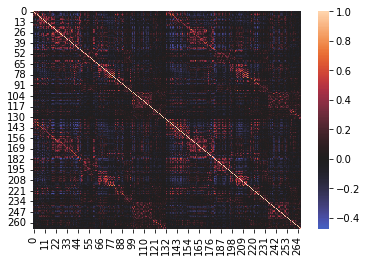

In [ ]:
_ = sns.heatmap(mean_corrs, center=0)

In [ ]:
mean_corrs = mean_corrs[ridx, cidx]

model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-maxT.csv 0 0
model-trialType_contrast-probe_success-probe_fail_datatype-edge_2ndlevel-maxT.csv 38 52


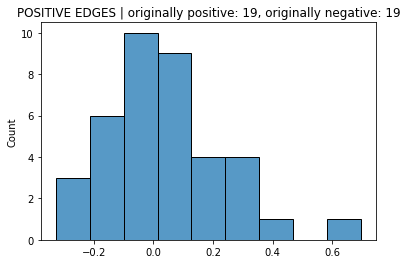

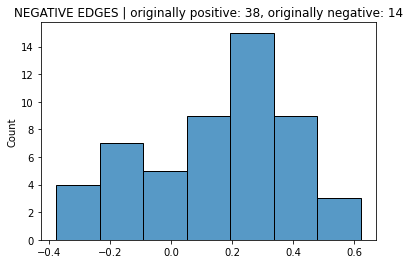

model-trialType_contrast-probe_success_datatype-edge_2ndlevel-maxT.csv 0 2


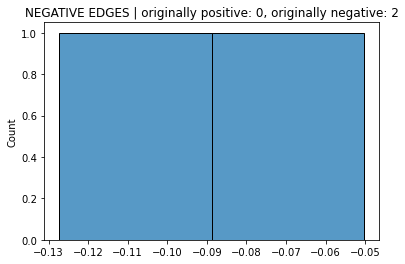

model-trialType_contrast-probe_success_datatype-edge_2ndlevel-maxT.csv 364 370


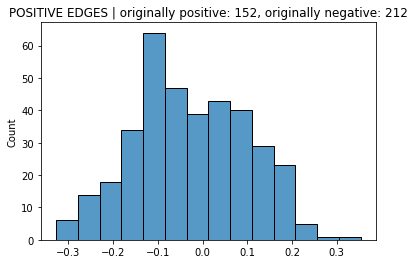

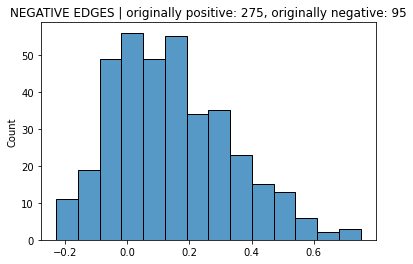

model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-maxT.csv 4 3


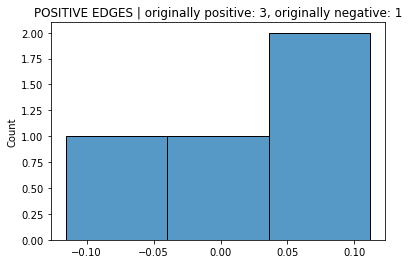

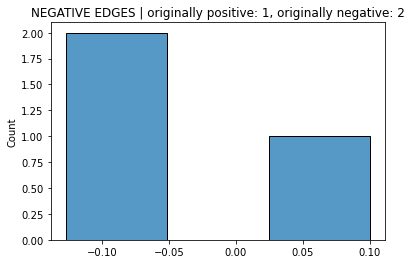

model-trialType_contrast-probe_fail+probe_success_datatype-edge_2ndlevel-maxT.csv 669 583


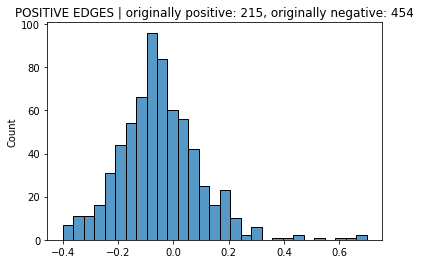

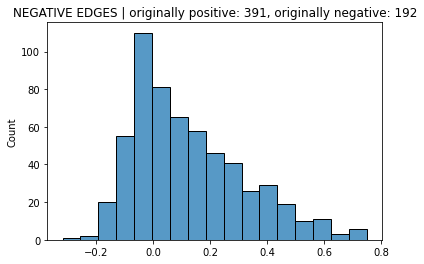

model-trialType_contrast-common_fail_datatype-edge_2ndlevel-maxT.csv 0 0
model-trialType_contrast-common_fail_datatype-edge_2ndlevel-maxT.csv 29 29


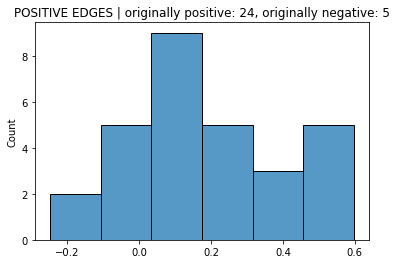

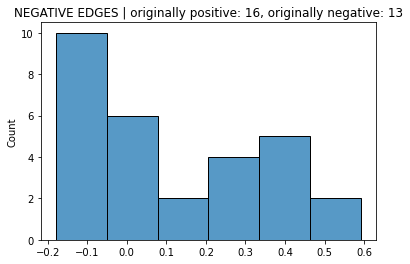

model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv 0 0
model-trialType_contrast-probe_fail_datatype-edge_2ndlevel-maxT.csv 325 283


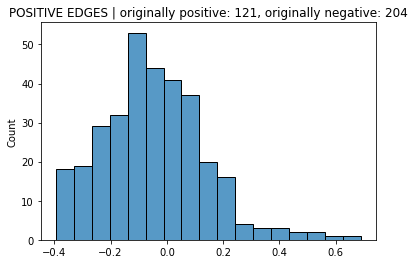

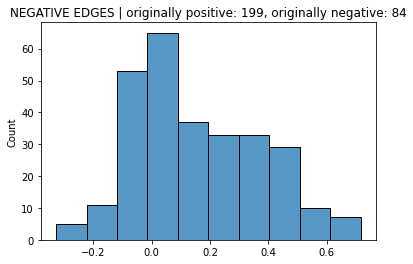

In [ ]:
dtypes = ['roi', 'edge']
for r, res in enumerate(overlapping_results):
    if not path.exists(path.join(secondlevel_dir % '1', res.replace('datatype-edge', 'datatype-roi')) ):
        continue
    
    for i, method in enumerate(["maxT", "NBS"]):
        curr_res = res.replace("maxT", method)

        d1_edges = pd.read_csv(path.join(secondlevel_dir % '1', curr_res), header=None).values
        d2_edges = pd.read_csv(path.join(secondlevel_dir % '2', curr_res), header=None).values
        
        pos_edges = ((d1_edges[ridx, cidx] > 0) * (d2_edges[ridx, cidx] > 0))
        neg_edges = ((d1_edges[ridx, cidx] < 0) * (d2_edges[ridx, cidx] < 0))
        
        print(res, sum(pos_edges), sum(neg_edges))

        if sum(pos_edges):
            ax = sns.histplot(mean_corrs[pos_edges])
            _ = ax.set_title(f'POSITIVE EDGES | originally positive: {(mean_corrs[pos_edges]>0).sum()}, originally negative: {(mean_corrs[pos_edges]<0).sum()}')
            plt.show()
            plt.close()
        
        if sum(neg_edges):
            ax = sns.histplot(mean_corrs[neg_edges])
            _ = ax.set_title(f'NEGATIVE EDGES | originally positive: {(mean_corrs[neg_edges]>0).sum()}, originally negative: {(mean_corrs[neg_edges]<0).sum()}')
            plt.show()
            plt.close()

# See edges that were predicted in the opposite direction

In [ ]:
mats = np.empty((len(overlapping_results), 2, 2), dtype='object')
dtypes = ['roi', 'edge']
for r, res in enumerate(overlapping_results):
    if not path.exists(path.join(secondlevel_dir % '1', res.replace('datatype-edge', 'datatype-roi')) ):
        continue
    
    for i, method in enumerate(["maxT", "NBS"]):
        for j, dtype in enumerate(dtypes):
            curr_res = res.replace("maxT", method).replace('edge', dtype)
            
            res_d1 = pd.read_csv(path.join(secondlevel_dir % '1', curr_res), header=None).values
            res_d2 = pd.read_csv(path.join(secondlevel_dir % '2', curr_res), header=None).values

            split_res[ridx, cidx] = res_d2[ridx, cidx]
            split_res = split_res.T # flip to fill in lower triangle
            split_res[ridx, cidx] = res_d1[ridx, cidx]

            max_val = max(max_val, np.nanmax(np.abs(split_res)))
            
            mats[r, i, j] = split_res

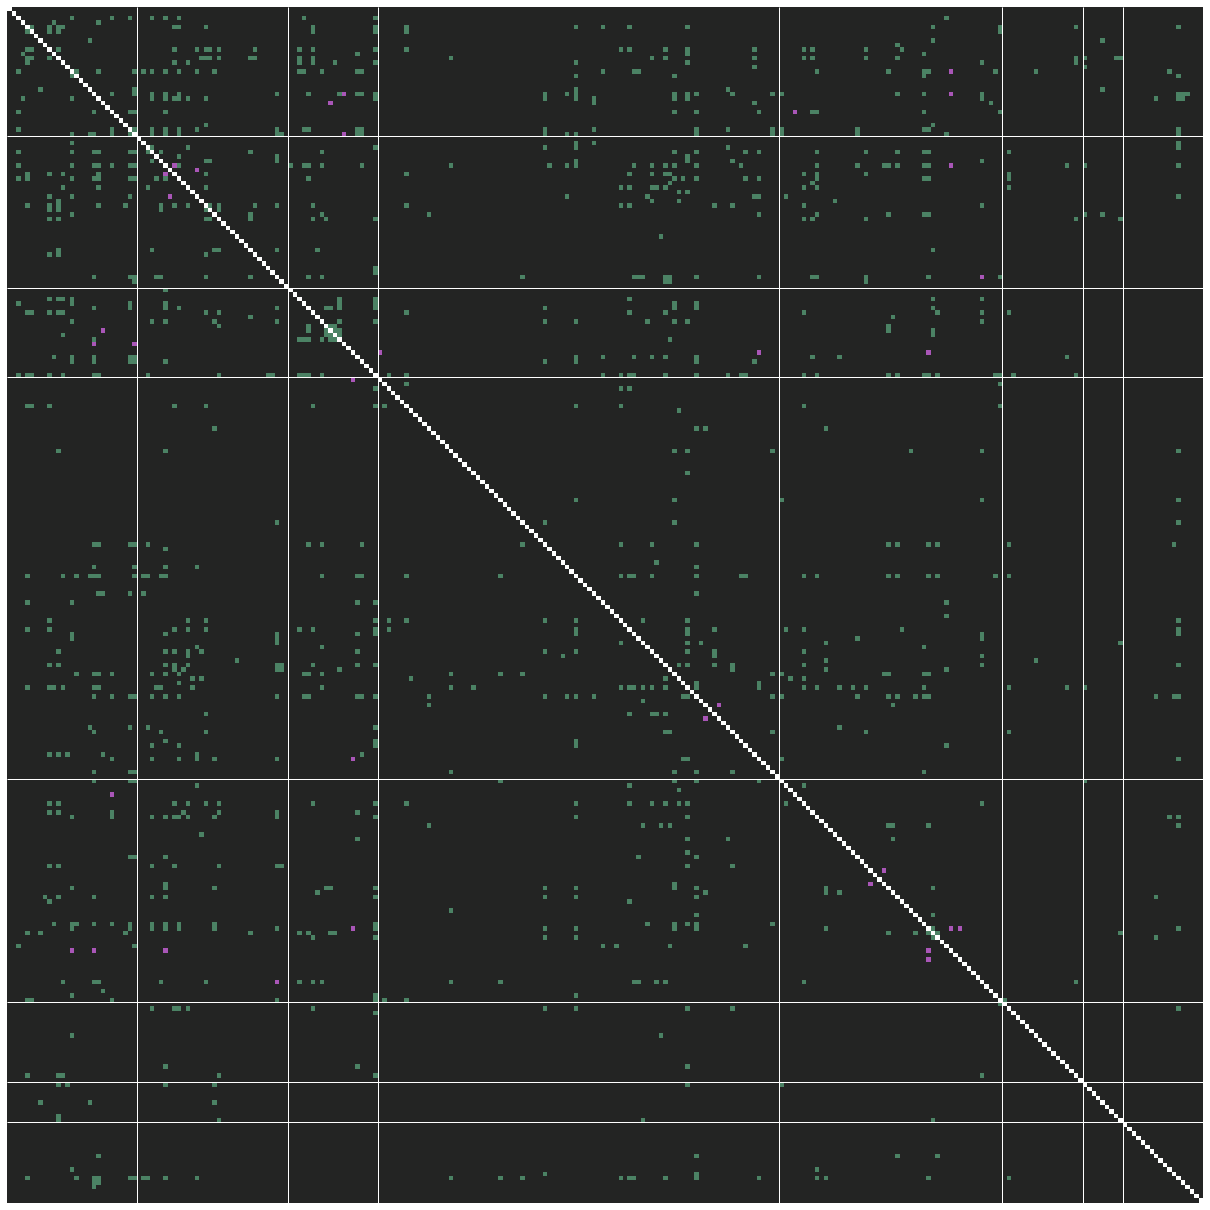

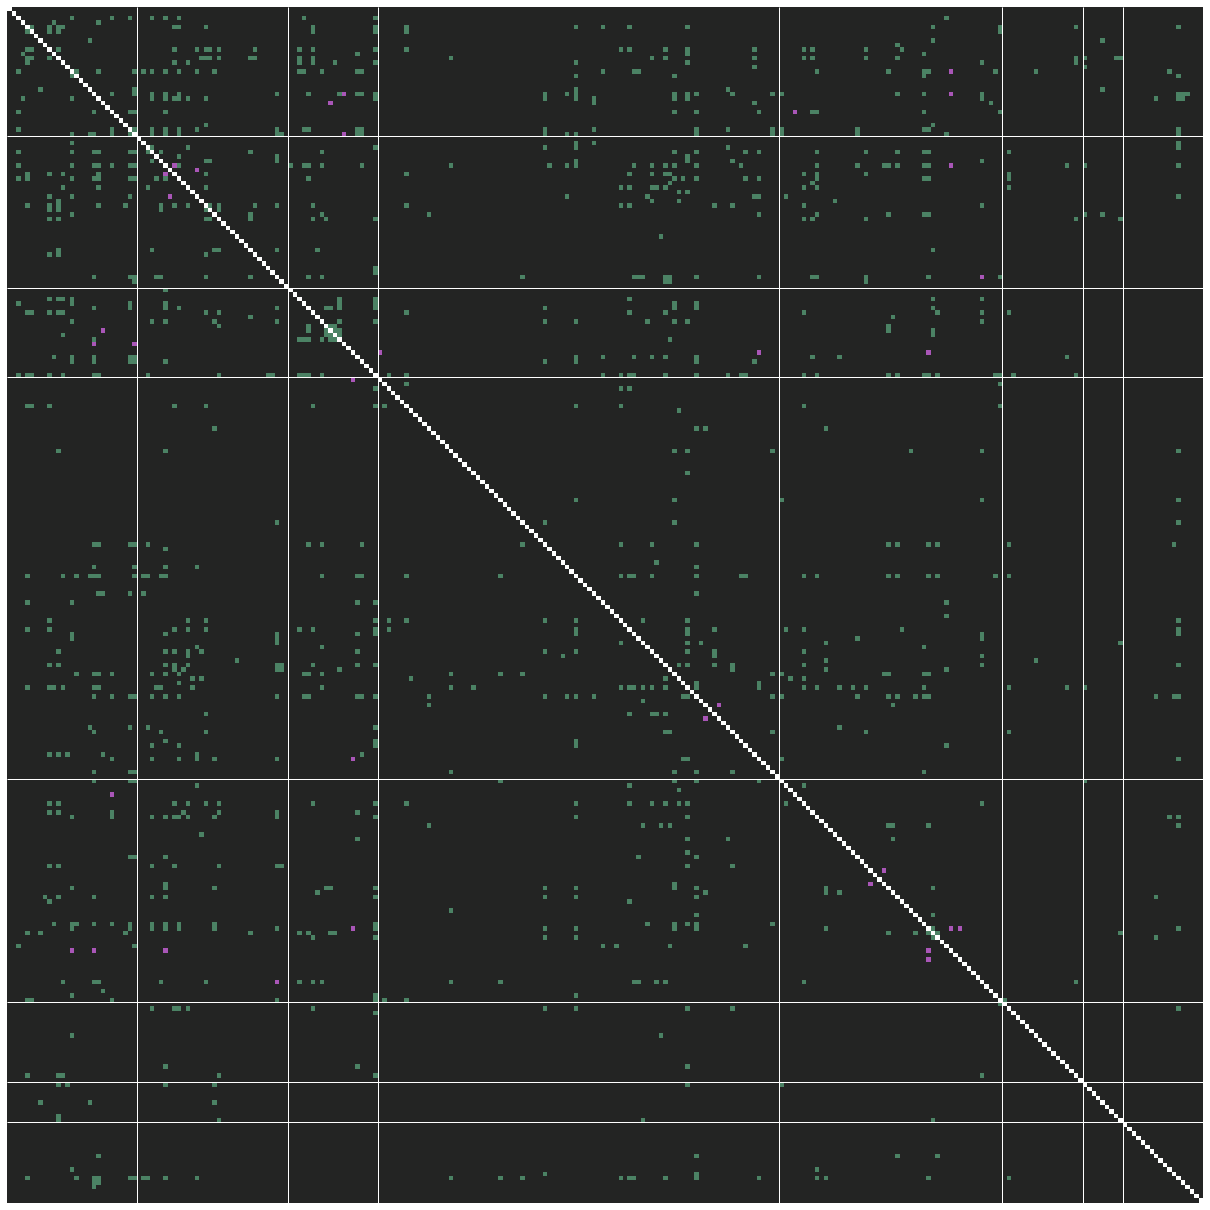

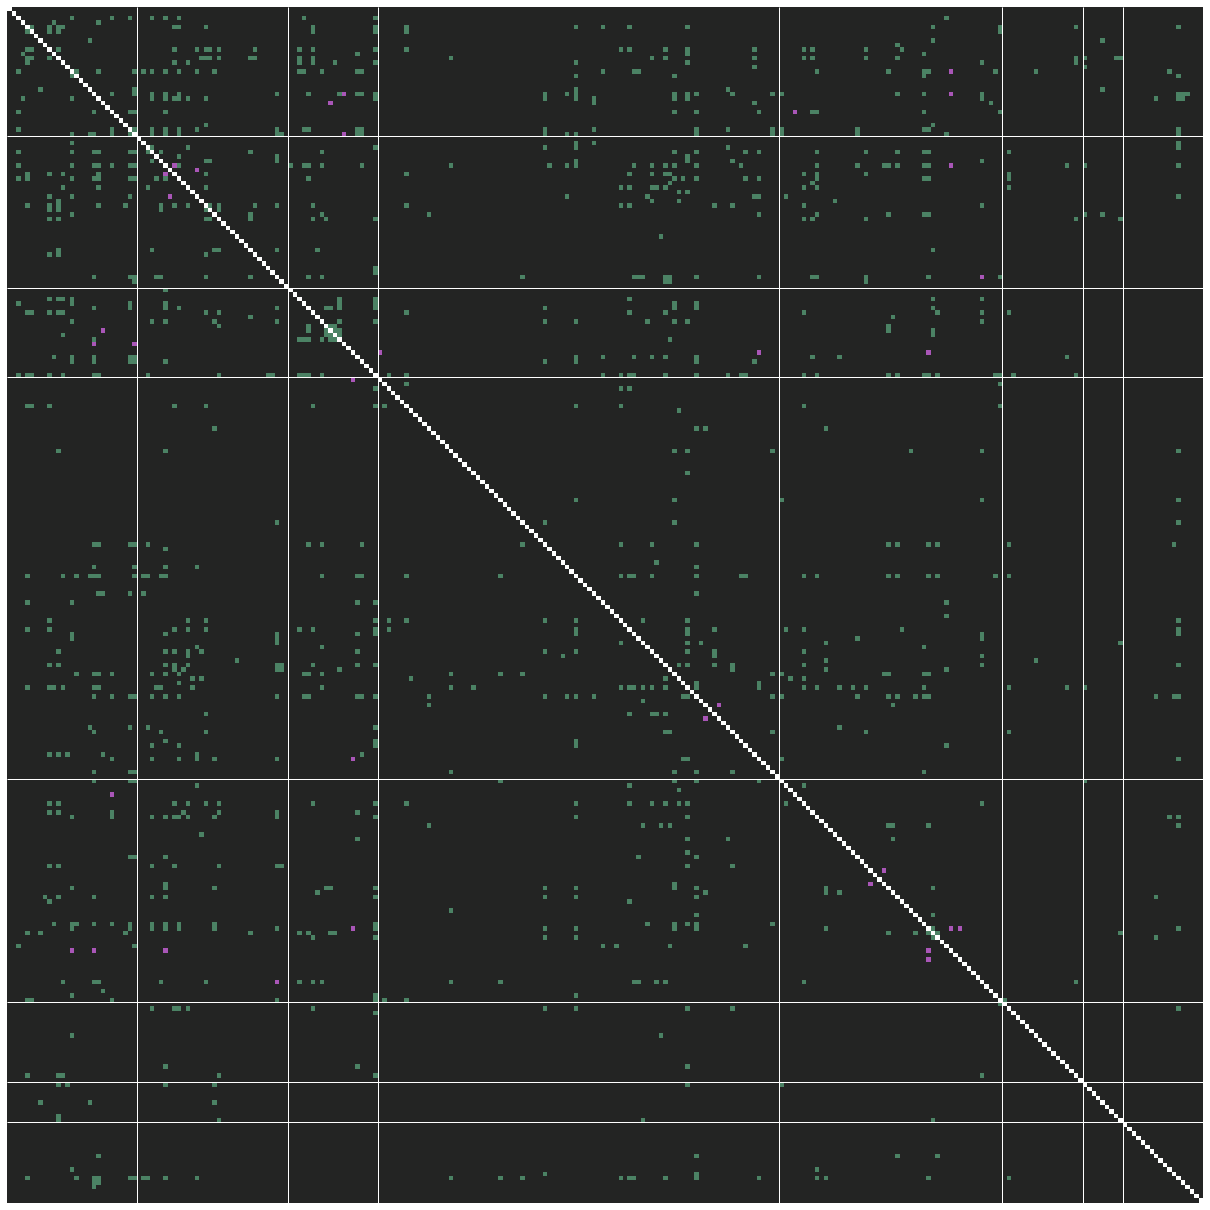

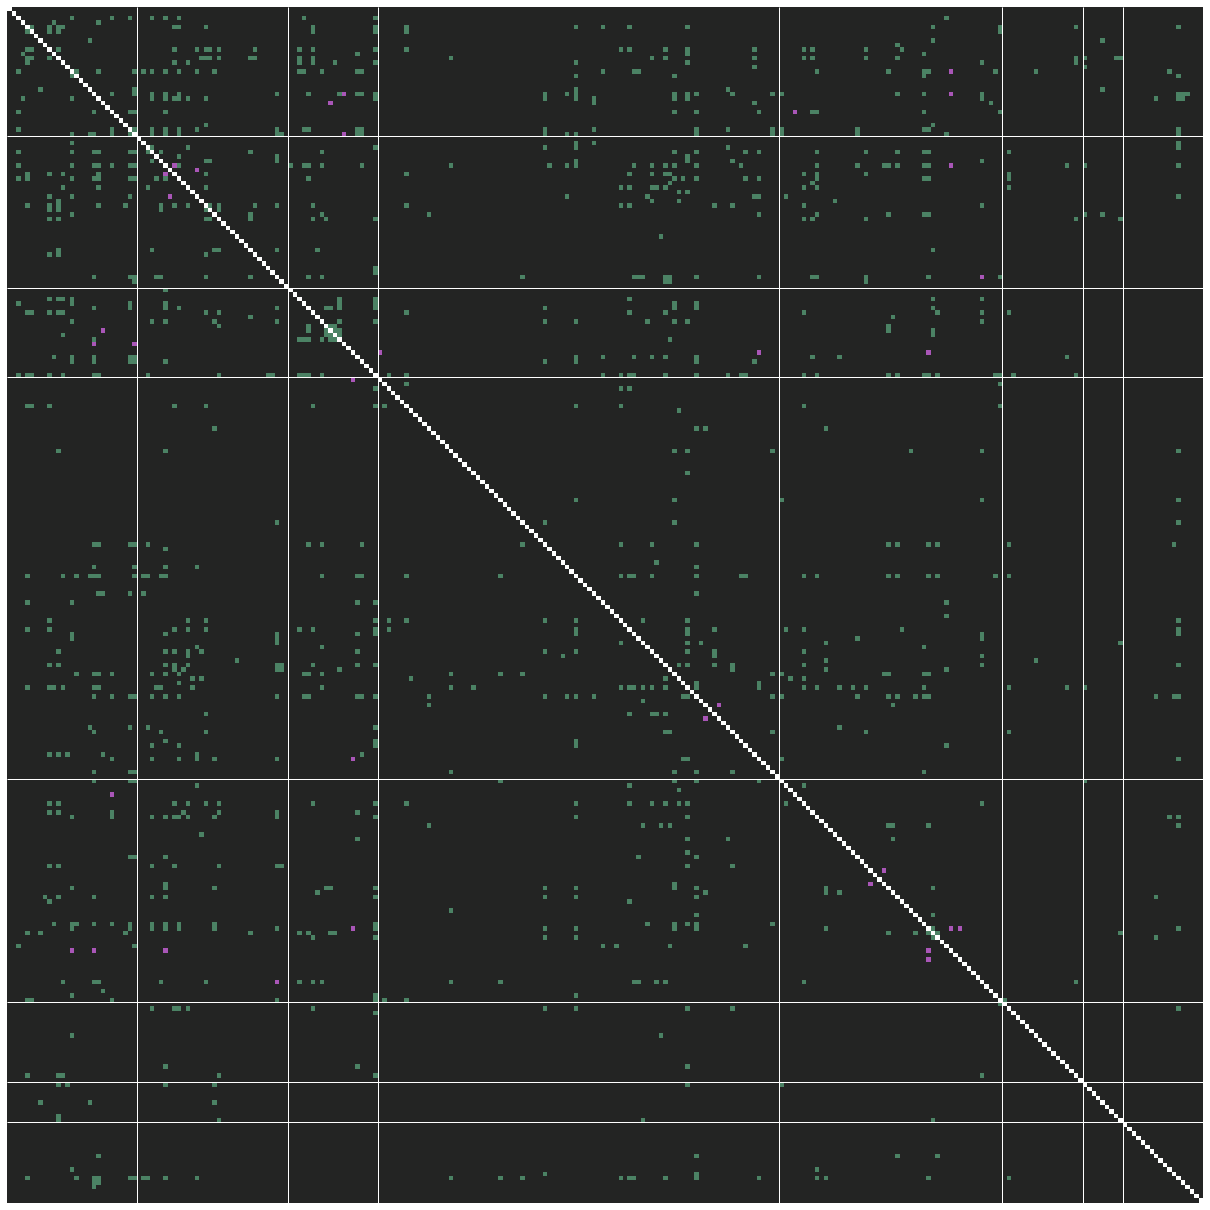

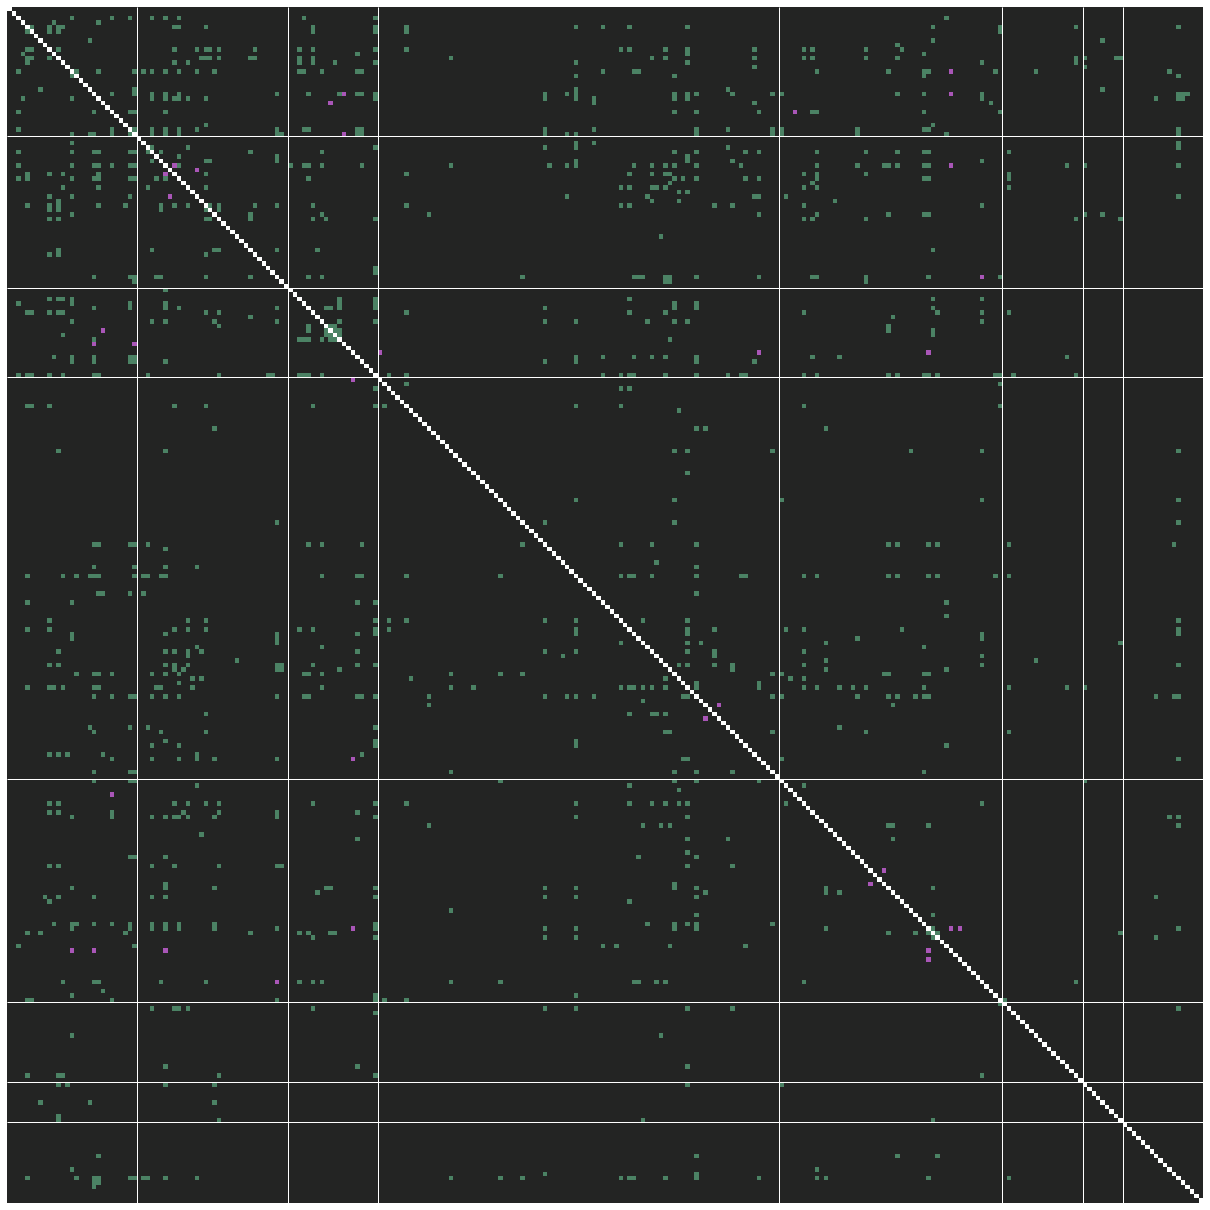

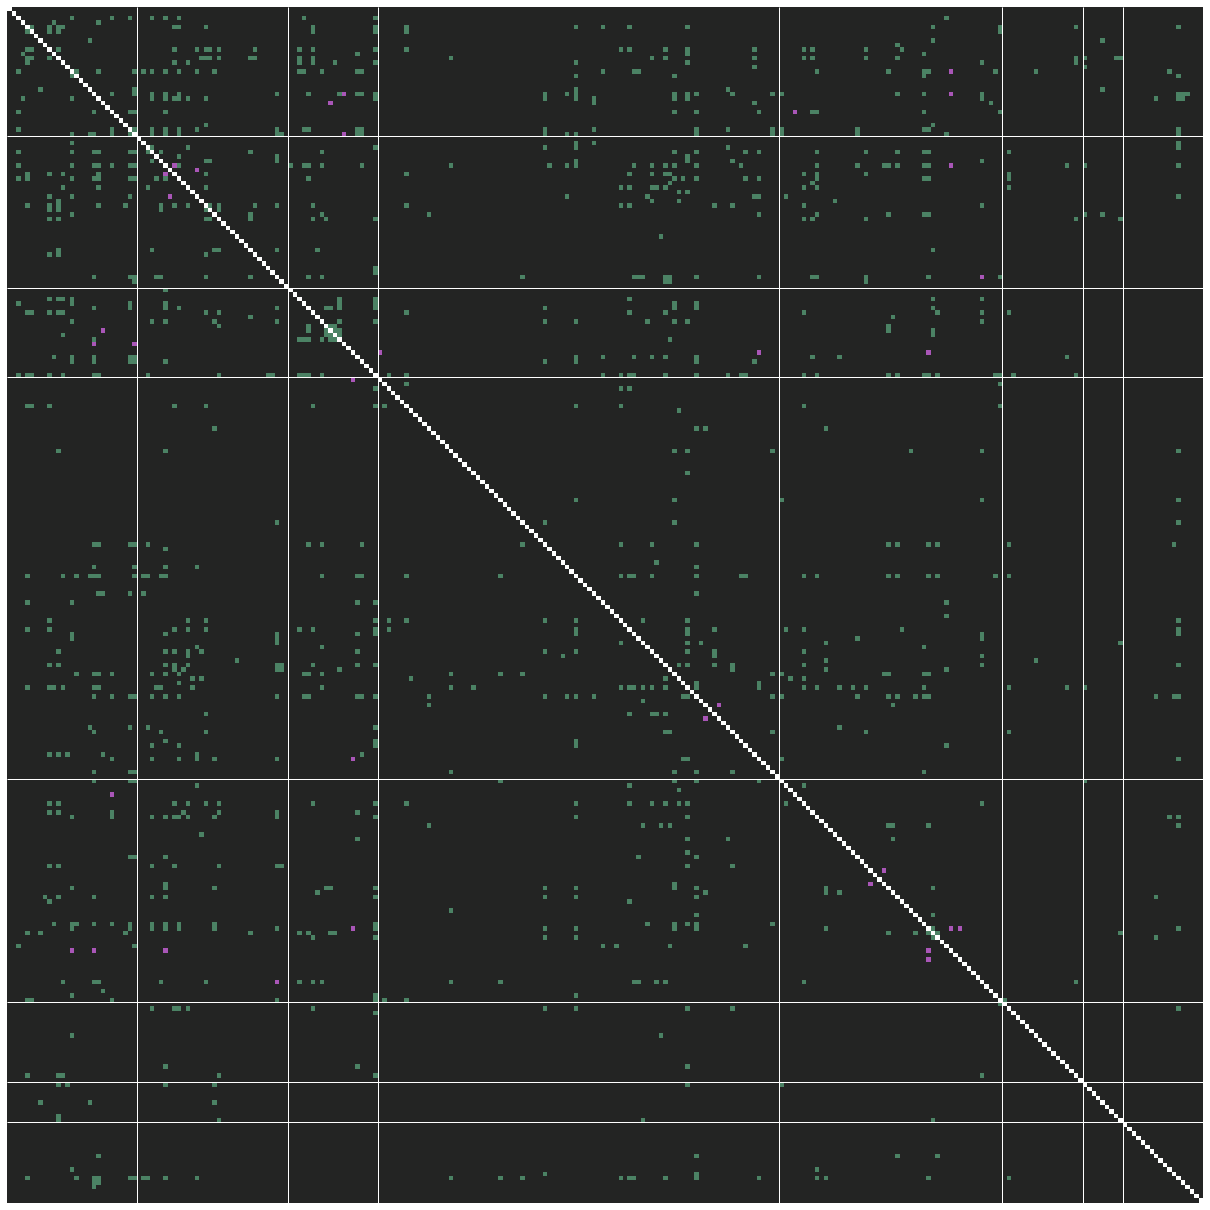

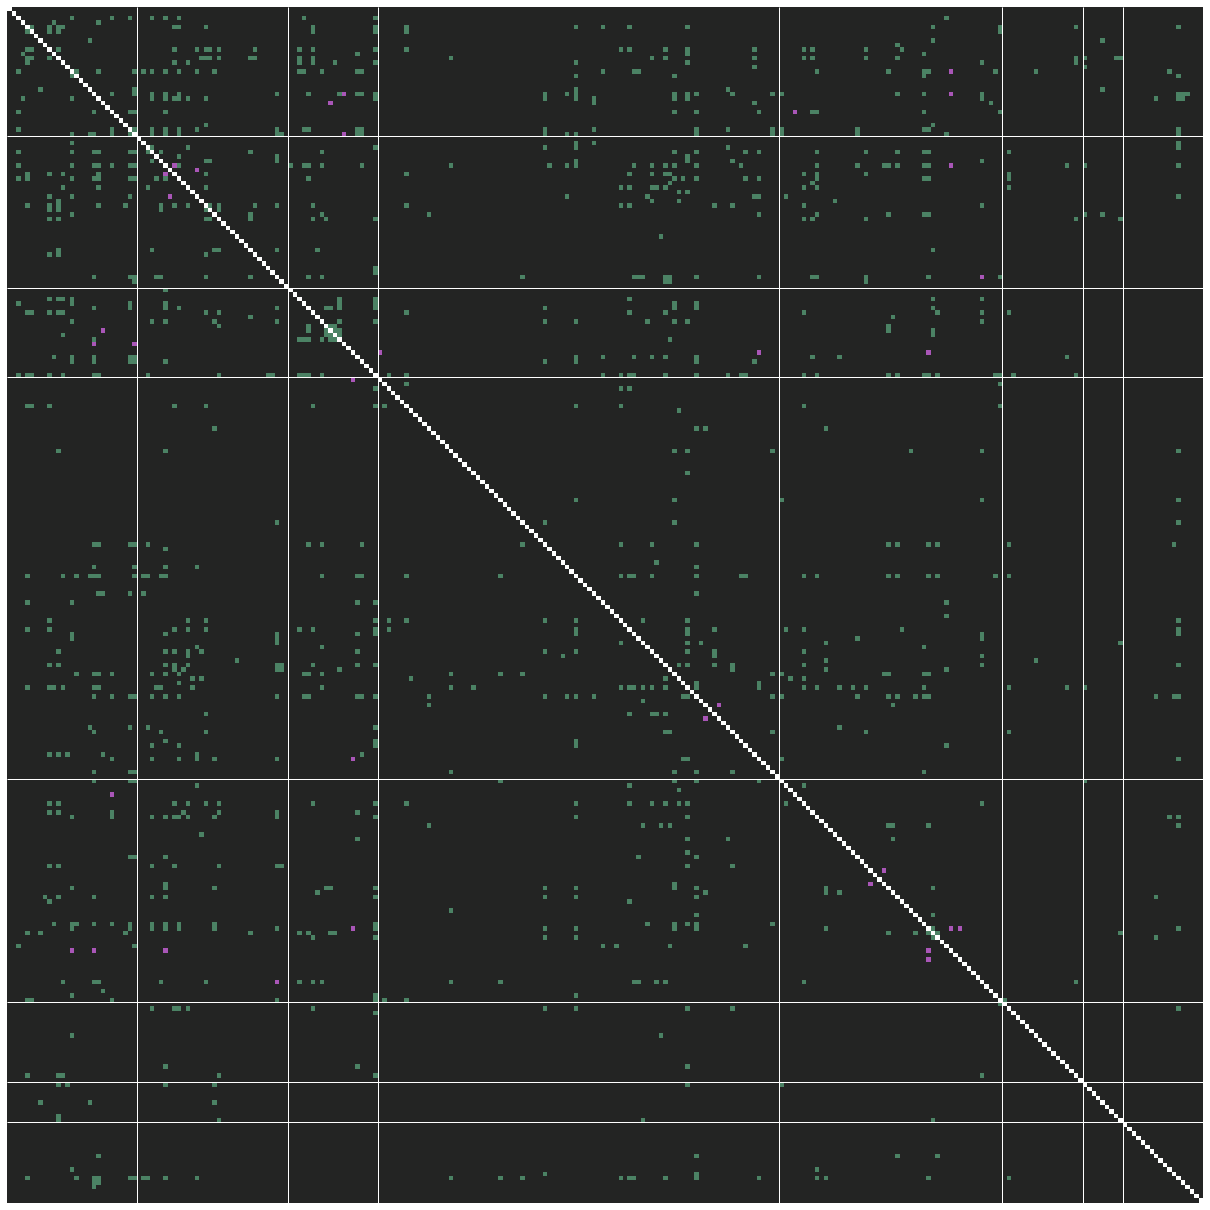

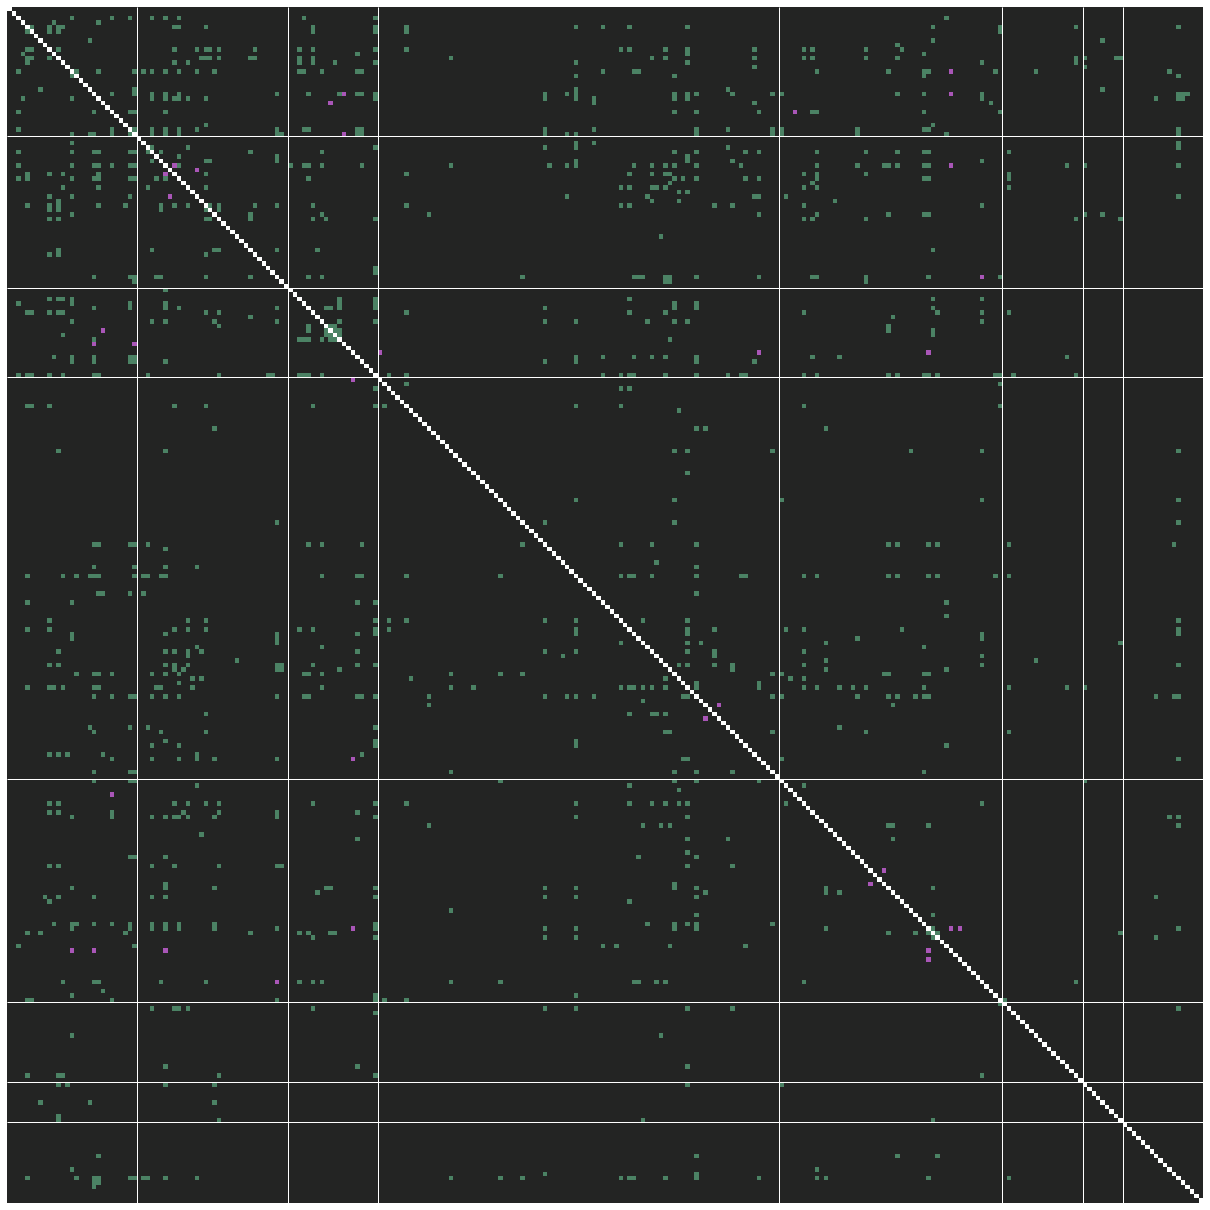

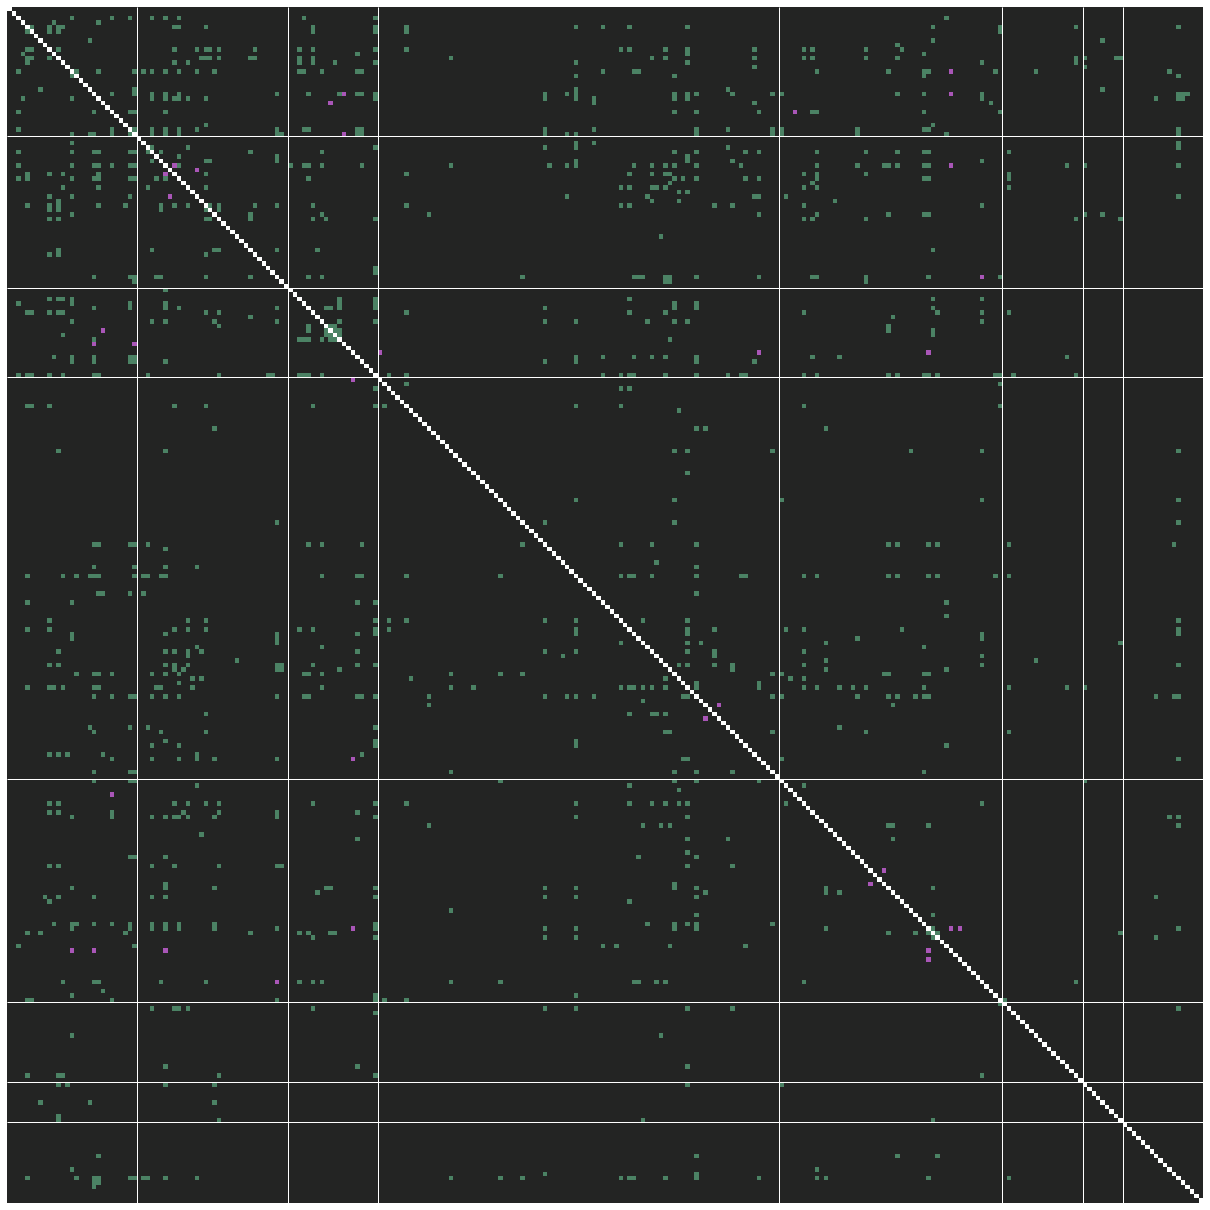

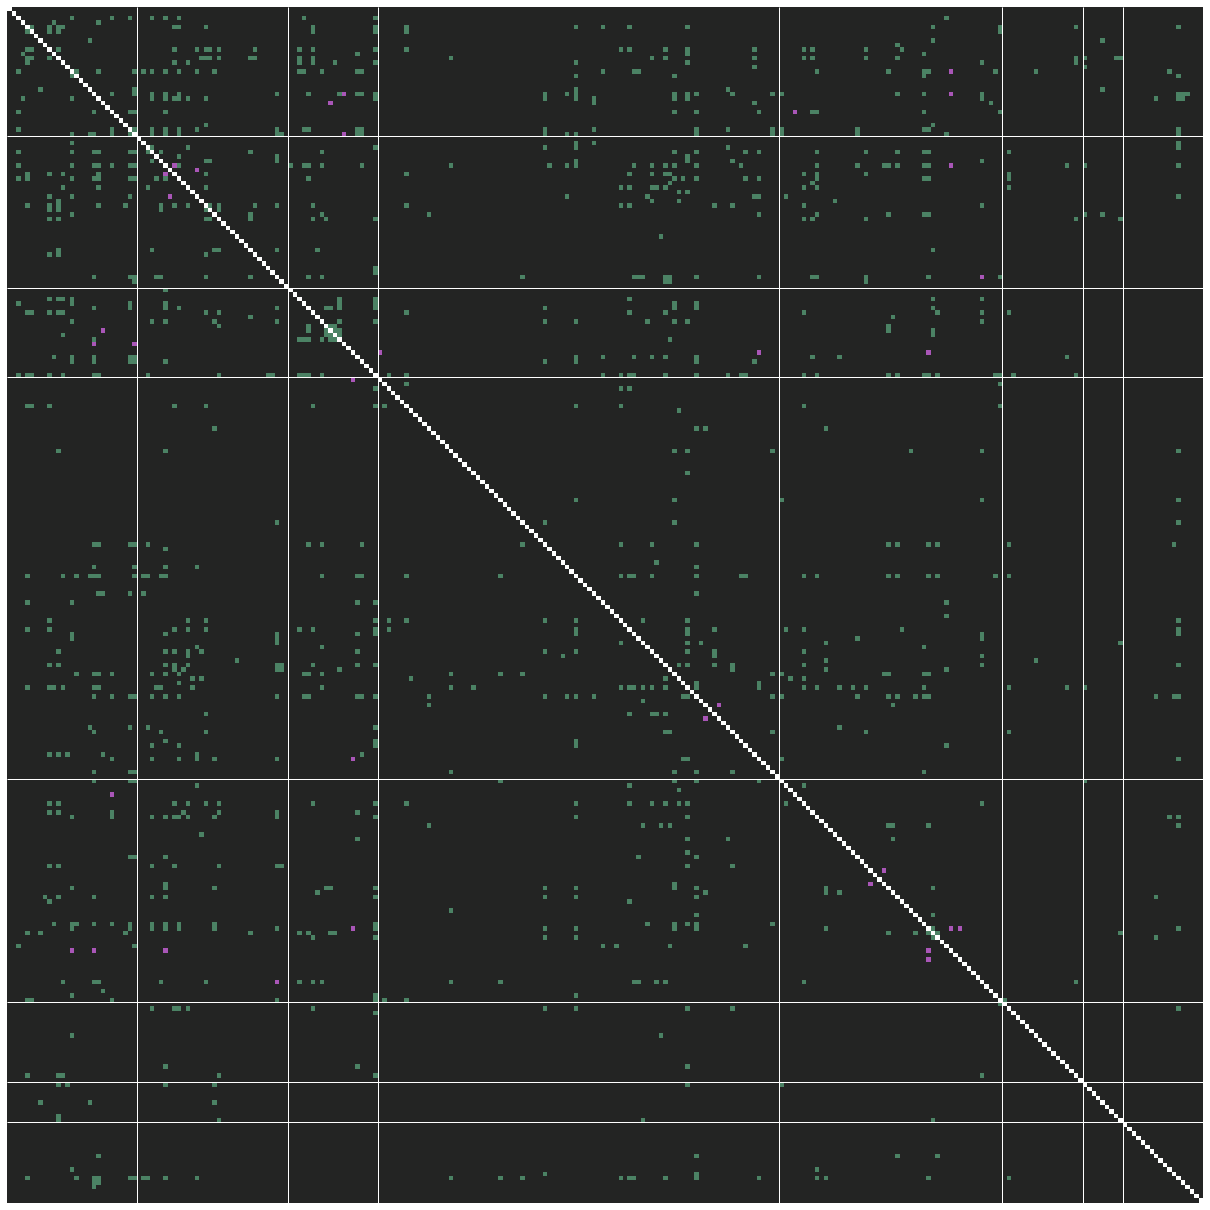

In [ ]:
for r, res in enumerate(overlapping_results):
    if not path.exists(path.join(secondlevel_dir % '1', res.replace('datatype-edge', 'datatype-roi')) ):
        continue
            
    
    # fig, axes = plt.subplots(2,2,figsize=(22,22))
    for i, method in enumerate(["maxT", "NBS"]):
        curr_res = res.replace("maxT", method)
        
        # Sign Change Plot
        bool_mat = np.where(mats[r, i, 0]!=0, 1, 0) * np.where(mats[r, i, 1]!=0, 1, 0) # find overlap of significant points
        sign_mat = np.sign(mats[r, i, 0])*np.sign(mats[r, i, 1])*bool_mat
        
        plt.figure(figsize=(22,22))
        ax = sns.heatmap(sign_mat,
                             square=True,
                             center=0,
                             cmap=sns.diverging_palette(300, 145, s=60, as_cmap=True, center='dark'),
                             cbar=False)
        
        _ = ax.hlines(cutoffs, *ax.get_xlim(), color='white', linewidth=1)
        _ = ax.vlines(cutoffs, *ax.get_xlim(), color='white', linewidth=1)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_aspect("equal")
        
        plt.savefig(f"results/figures/ROIminusEdge_heatmap_{curr_res.replace('csv', 'png')}", bbox_inches="tight", pad_inches=0)
        plt.show()
        plt.close()
        


# OLD - check whether distribution across significant edges across networks correlates between datasets

In [ ]:
from scipy.stats import spearmanr

In [ ]:
nperms=10000

In [ ]:
net_ridx, net_cidx = np.tril_indices(8, 0) # want to include the diagonal

def compress_mat_and_flatten(res_mat):            
    pos_condensed_mat = np.full((8,8), np.nan)
    neg_condensed_mat = np.full((8,8), np.nan)
    
    for i in np.unique(ordered_networks):
        for j in np.unique(ordered_networks):
            curr_idx = (ordered_networks[ridx]==i)*(ordered_networks[cidx]==j)
            if curr_idx.sum(): # if there are values for this order
                curr_edges = res_mat[ridx[curr_idx], cidx[curr_idx]] 
                pos_count = np.sum(curr_edges > 0)
                neg_count = np.sum(curr_edges < 0)
                n_edges = len(curr_edges)

                pos_condensed_mat[i-1, j-1] = pos_count/n_edges
                neg_condensed_mat[i-1, j-1] = neg_count/n_edges
                
    
    return np.concatenate([pos_condensed_mat[net_ridx, net_cidx], neg_condensed_mat[net_ridx, net_cidx]])
            

In [ ]:
vtc_res = [(r,res) for r,res in enumerate(overlapping_results) if ('VTCcorr' in res) or ('convolvedDemeaned' in res)]

In [ ]:
i, method = 1, 'NBS'

indices = np.arange(0, 268)

for r, res in vtc_res:
    print(res)
    res_mat = mats[i, r]
    
    d1_vector = compress_mat_and_flatten(res_mat)
    d2_vector = compress_mat_and_flatten(res_mat.T)
    
    obs_corr_pearson = np.corrcoef(d1_vector, d2_vector)[0,1]
    print(obs_corr_pearson)
    obs_corr_spearman = spearmanr(d1_vector, d2_vector)[0]
    print(obs_corr_spearman)
    
    # make 2 symmetric matrices to enable node shuffling
    d1_mat = np.full((args.nROI,args.nROI), np.nan)
    d1_mat[ridx, cidx] = res_mat[ridx, cidx]
    d1_mat = d1_mat.T
    d1_mat[ridx, cidx] = res_mat[ridx, cidx]
    
    d2_mat = np.full((args.nROI,args.nROI), np.nan)
    d2_mat[ridx, cidx] = res_mat.T[ridx, cidx]
    d2_mat = d2_mat.T
    d2_mat[ridx, cidx] = res_mat.T[ridx, cidx]
    
    perm_corrs_pearson = np.full(nperms, np.nan)
    perm_corrs_spearman = np.full(nperms, np.nan)
    for p in range(nperms):
        np.random.shuffle(indices)
        d1_mat_perm = d1_mat[np.ix_(indices, indices)]
        d1_vec_perm = compress_mat_and_flatten(d1_mat_perm)
        
        np.random.shuffle(indices)
        d2_mat_perm = d2_mat[np.ix_(indices, indices)]
        d2_vec_perm = compress_mat_and_flatten(d2_mat_perm)
        
        perm_corrs_pearson[p] = np.corrcoef(d1_vec_perm, d2_vec_perm)[0,1]
        perm_corrs_spearman[p] = spearmanr(d1_vec_perm, d2_vec_perm)[0]
        
    # Pearson Corr
    sns.histplot(perm_corrs_pearson)
    _ = plt.axvline(obs_corr_pearson, color='k')
    print('p-val: ', ((np.abs(perm_corrs_pearson) >= obs_corr_pearson).sum()+1) / (nperms+1))
    plt.show()
    plt.close()
          
    # Spearman Corr
    sns.histplot(perm_corrs_spearman)
    _ = plt.axvline(obs_corr_spearman, color='k')
    print('p-val: ', ((np.abs(perm_corrs_spearman) >= obs_corr_spearman).sum()+1) / (nperms+1))
    plt.show()
    plt.close()
    
        

model-VTCcorr_contrast-VTCcorr_datatype-edge_2ndlevel-maxT.csv


IndexError: index 3 is out of bounds for axis 1 with size 2